In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df = df[df['state_day'] == 0.0]
if 'state_day' in df.columns.values:
    df = df.drop('state_day', axis=1)
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,state_night,state_dawn,vm1,vd1,vm2,vd2,gvtec1_dt_lag_9,gvtec2_dt_lag_20,vtec_dt_lag_3,s4
2013-12-01 21:40:00,36.877390,-0.170033,0.335078,-3.048065,0.096289,-2.907215,-0.265355,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.536057,-5.020321,-1.379595,0.177822
2013-12-01 21:50:00,37.131272,0.216655,0.386689,-2.773296,0.172740,-1.750093,0.906307,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.284366,-4.088838,-0.458489,0.180049
2013-12-01 22:00:00,37.877660,0.560146,0.343491,-2.484819,0.158693,0.583867,1.857452,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.075316,-2.953723,0.606768,0.183688
2013-12-01 22:10:00,38.863345,0.795685,0.235539,-2.341564,0.031913,3.496344,2.421628,1.0,0.0,40.635861,12.624579,40.547146,12.192698,0.000009,-1.878747,1.572487,0.186903
2013-12-01 22:20:00,39.850060,0.902925,0.107240,-2.474694,-0.181491,6.352723,2.587949,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.108111,-1.055237,2.258756,0.187446
2013-12-01 22:30:00,40.734126,0.912069,0.009144,-2.939743,-0.412240,8.772829,2.489508,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.400623,-0.497515,2.610678,0.185736
2013-12-01 22:40:00,41.551745,0.897791,-0.014278,-3.671899,-0.575962,10.769271,2.318025,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-0.834600,-0.029196,2.712784,0.183350
2013-12-01 22:50:00,42.350367,0.926650,0.028859,-4.479855,-0.611842,12.650887,2.208283,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-1.338519,0.617716,2.736510,0.180991
2013-12-01 23:00:00,43.208498,0.991332,0.064682,-5.123506,-0.513421,14.734552,2.155063,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-1.835321,1.635482,2.815774,0.177765
2013-12-01 23:10:00,44.291752,1.008872,0.017540,-5.449179,-0.338458,17.040744,2.012104,1.0,0.0,40.635861,12.624579,40.547146,12.192698,-2.270068,2.996635,2.926854,0.175380


In [4]:
df.columns.values

array(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2',
       'vd2', 'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3',
       's4'], dtype=object)

In [5]:
original = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
tempo  = ['state_night', 'state_dawn']
mdv1 = ['vm1', 'vd1']
mdv2 = ['vm2', 'vd2']
lag = ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20']

In [6]:
def generate_and_avaliate_model(df, instances_set, target, file_to_save_model=None, model=None):
    if not model:
        # generate model, use k-fold crossvalidation and print scores
        model = RandomForestRegressor()
        
    scaler = StandardScaler()
    scaler.fit(X=df[instances_set].values) 
    X = scaler.transform(X=df[instances_set].values)
    y = df['s4'].values
    
    size = len(X)
    last_element = size - size//10
    

    X_train, X_test, y_train, y_test = train_test_split(X[0:last_element], y[0:last_element], test_size=0.30, random_state=42)
    index = df.index.values[last_element:size+1]
                
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    
    # generate final model, and avaliate a test set
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    give_error(y_test, y_predict);
    print()

    # use the final model to avaliate the error in a sample of the time series
    df_aux = pd.DataFrame(index=index)
    df_aux['predito'] = model.predict(X[last_element:size+1])
    df_aux['real'] = y[last_element:size+1]

    print('Error for the time series sample:')
    give_error(df_aux['real'].values, df_aux['predito'].values);

    # plot the time series predict against the real values
    ax = df_aux.plot(figsize=(18, 8));
    plt.xlabel('UT')

    lat, long = location_station('sj2')
    set_of_sunrise = find_set_sunrise(df_aux, lat, long)
    set_of_sunset = find_set_sunset(df_aux, lat, long)
    for i in set_of_sunrise:
        ax.axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax.axvline(x=i, color='r')

    plt.tight_layout()
    if file_to_save_model:
        plt.savefig(file_to_save_model, format='eps', dpi=1000)
    else:
        plt.show()

O erro quadrático médio foi: 0.002017
O erro quadrático total foi: 1.750815
O maior erro por previsão foi: 0.353282
O erro relativo foi: 12.070413%
O número de verdadeiros negativos foi: 975
O número de verdadeiros positivos foi: 282
O número de falsos negativos foi: 71
O número de falsos positivos foi: 192
O POD foi: 0.798867
O FAR foi: 0.405063
A ACC foi: 0.826974
O kappa foi: 0.053397

Error for the time series sample:
O erro quadrático médio foi: 0.008166
O erro quadrático total foi: 2.142238
O maior erro por previsão foi: 0.473130
O erro relativo foi: 23.193807%
O número de verdadeiros negativos foi: 269
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 140
O POD foi: 0.816993
O FAR foi: 0.528302
A ACC foi: 0.701068
O kappa foi: 0.079254


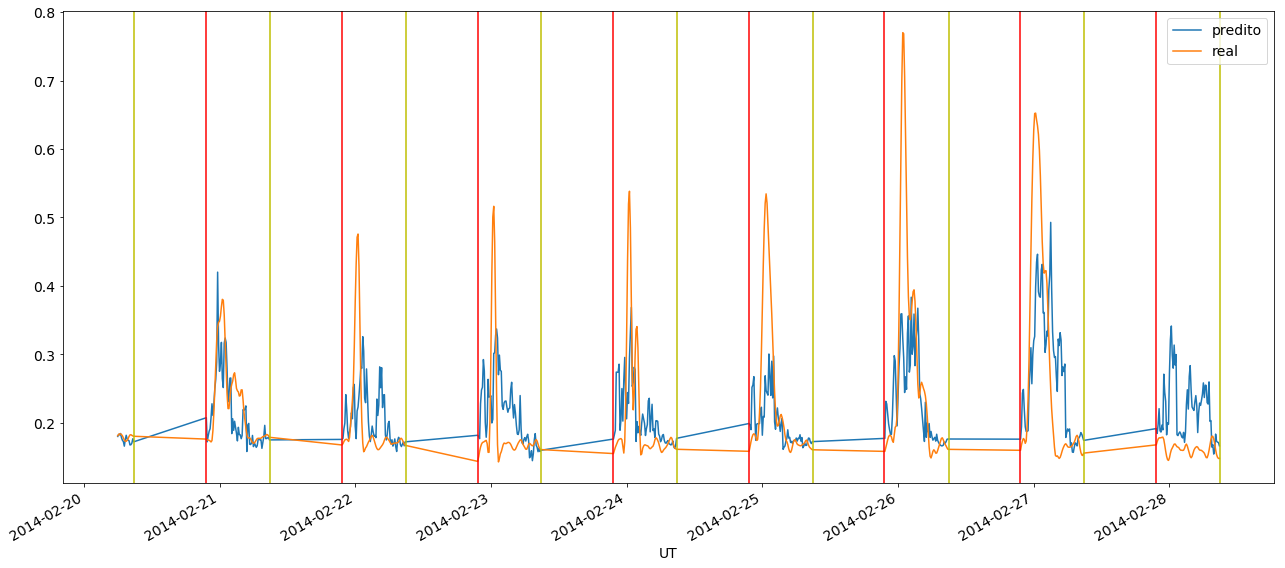

In [7]:
generate_and_avaliate_model(df, original, 's4')

O erro quadrático médio foi: 0.002382
O erro quadrático total foi: 1.902960
O maior erro por previsão foi: 0.323848
O erro relativo foi: 13.971997%
O número de verdadeiros negativos foi: 934
O número de verdadeiros positivos foi: 253
O número de falsos negativos foi: 100
O número de falsos positivos foi: 233
O POD foi: 0.716714
O FAR foi: 0.479424
A ACC foi: 0.780921
O kappa foi: 0.065941

Error for the time series sample:
O erro quadrático médio foi: 0.010200
O erro quadrático total foi: 2.394228
O maior erro por previsão foi: 0.460559
O erro relativo foi: 29.840200%
O número de verdadeiros negativos foi: 227
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 182
O POD foi: 0.823529
O FAR foi: 0.590909
A ACC foi: 0.628114
O kappa foi: 0.092011


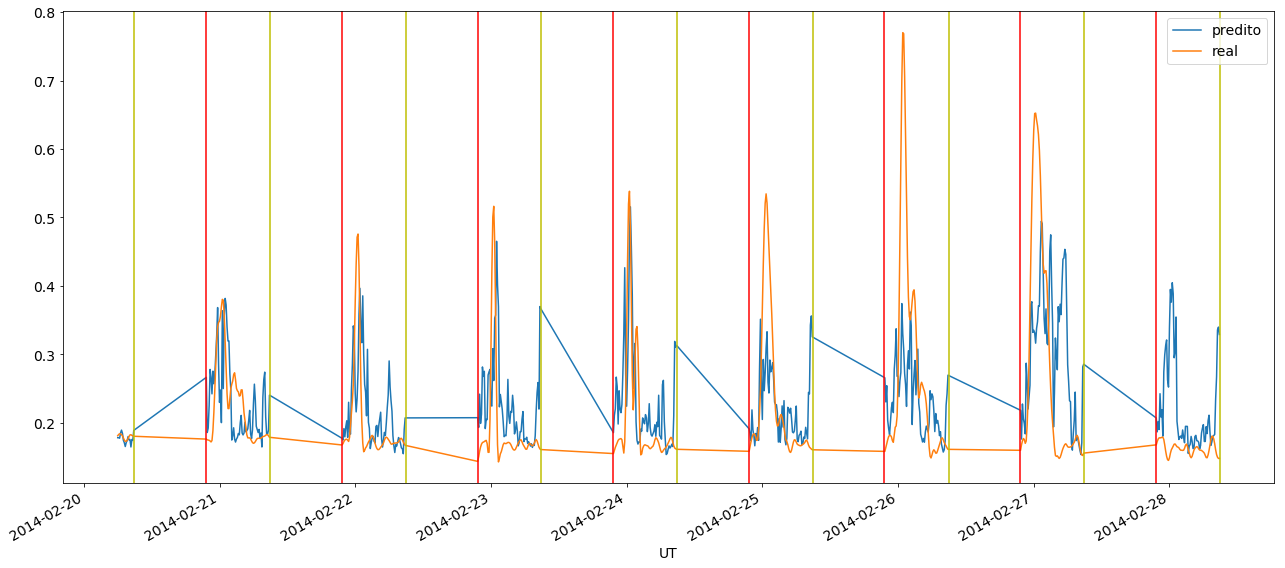

In [8]:
generate_and_avaliate_model(df, ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001924
O erro quadrático total foi: 1.710173
O maior erro por previsão foi: 0.311853
O erro relativo foi: 12.288549%
O número de verdadeiros negativos foi: 963
O número de verdadeiros positivos foi: 274
O número de falsos negativos foi: 79
O número de falsos positivos foi: 204
O POD foi: 0.776204
O FAR foi: 0.426778
A ACC foi: 0.813816
O kappa foi: 0.057121

Error for the time series sample:
O erro quadrático médio foi: 0.008185
O erro quadrático total foi: 2.144733
O maior erro por previsão foi: 0.398839
O erro relativo foi: 23.811651%
O número de verdadeiros negativos foi: 274
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 135
O POD foi: 0.869281
O FAR foi: 0.503731
A ACC foi: 0.724199
O kappa foi: 0.074198


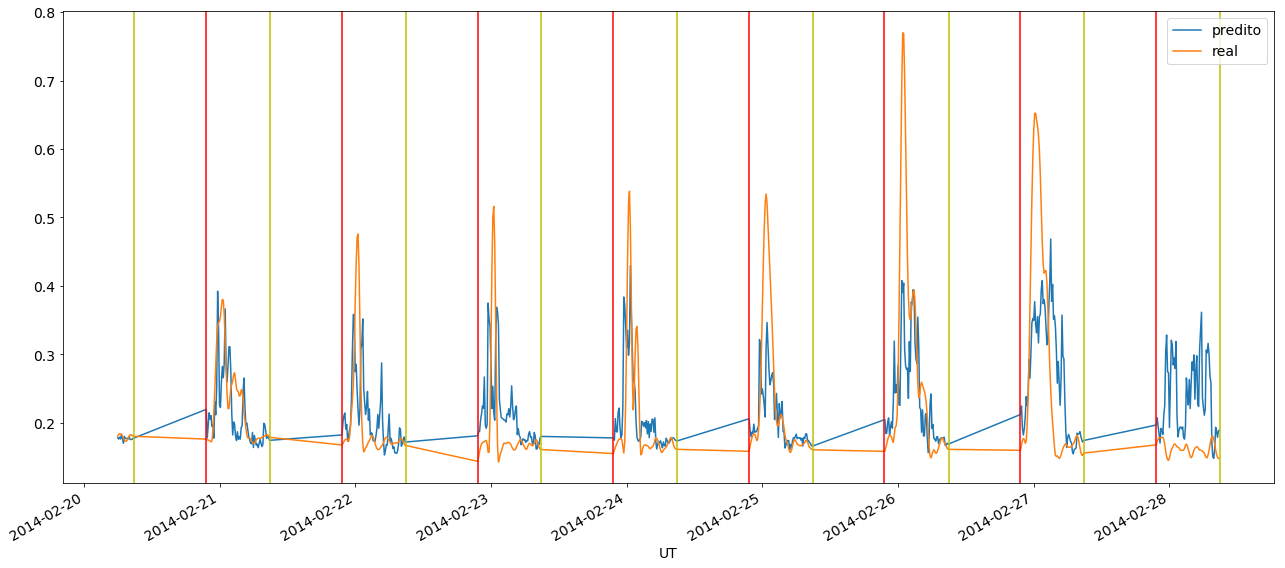

In [9]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001950
O erro quadrático total foi: 1.721526
O maior erro por previsão foi: 0.344685
O erro relativo foi: 12.229259%
O número de verdadeiros negativos foi: 957
O número de verdadeiros positivos foi: 281
O número de falsos negativos foi: 72
O número de falsos positivos foi: 210
O POD foi: 0.796034
O FAR foi: 0.427699
A ACC foi: 0.814474
O kappa foi: 0.055364

Error for the time series sample:
O erro quadrático médio foi: 0.007656
O erro quadrático total foi: 2.074221
O maior erro por previsão foi: 0.433512
O erro relativo foi: 24.140861%
O número de verdadeiros negativos foi: 252
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 157
O POD foi: 0.836601
O FAR foi: 0.550877
A ACC foi: 0.676157
O kappa foi: 0.083573


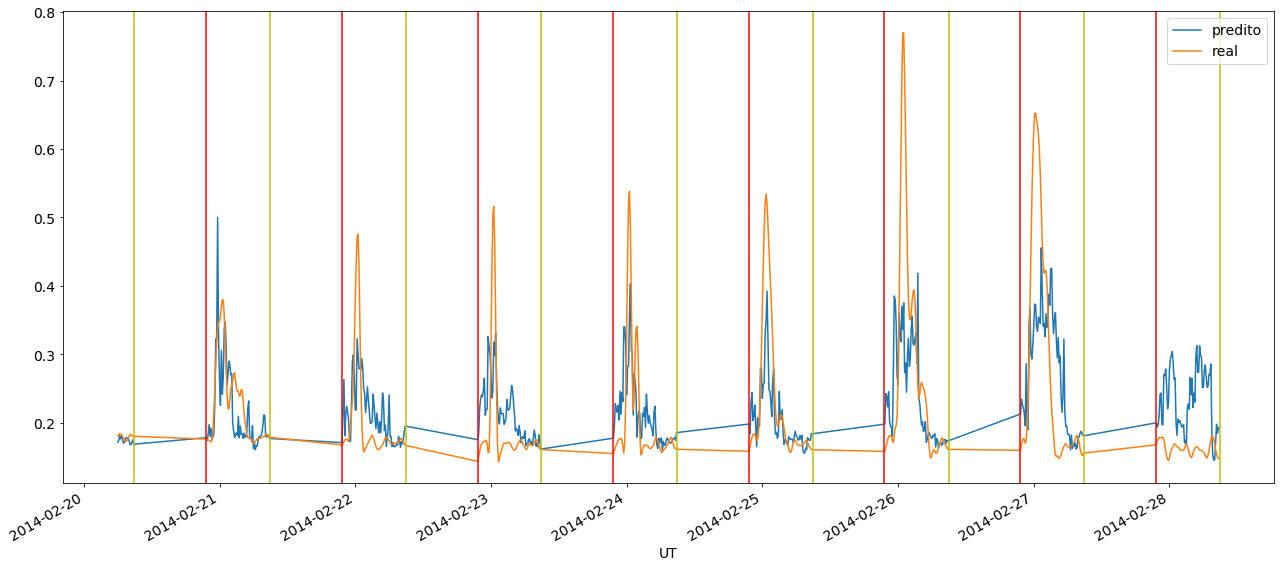

In [10]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.002382
O erro quadrático total foi: 1.902796
O maior erro por previsão foi: 0.338595
O erro relativo foi: 12.888534%
O número de verdadeiros negativos foi: 941
O número de verdadeiros positivos foi: 274
O número de falsos negativos foi: 79
O número de falsos positivos foi: 226
O POD foi: 0.776204
O FAR foi: 0.452000
A ACC foi: 0.799342
O kappa foi: 0.058978

Error for the time series sample:
O erro quadrático médio foi: 0.008141
O erro quadrático total foi: 2.138963
O maior erro por previsão foi: 0.364562
O erro relativo foi: 23.848129%
O número de verdadeiros negativos foi: 242
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 167
O POD foi: 0.836601
O FAR foi: 0.566102
A ACC foi: 0.658363
O kappa foi: 0.086834


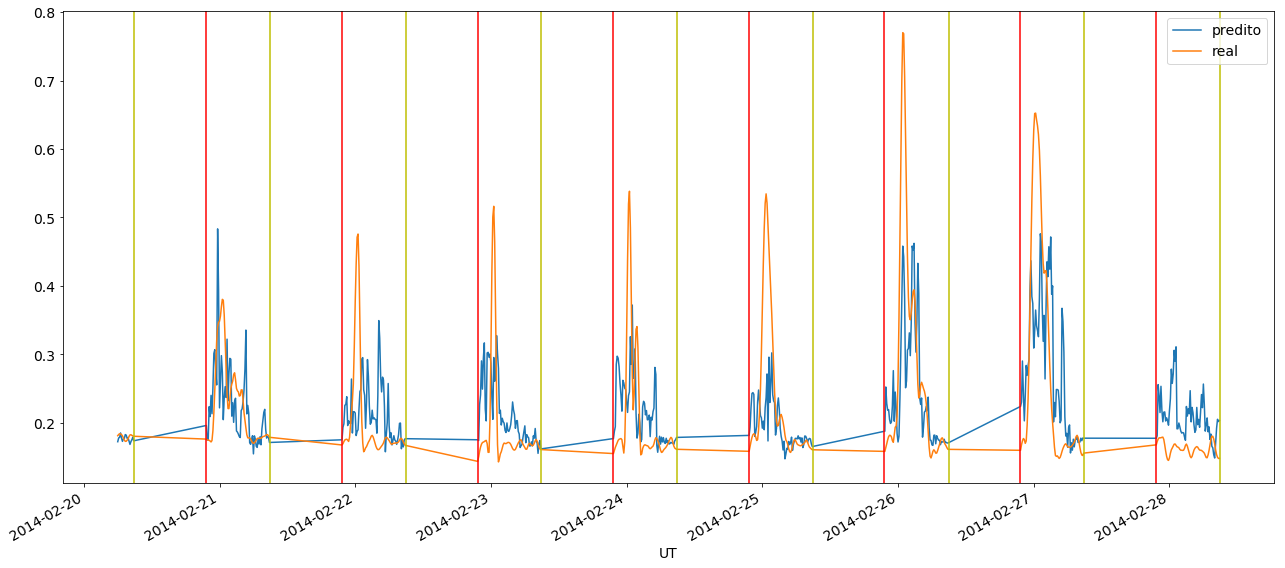

In [11]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001761
O erro quadrático total foi: 1.636072
O maior erro por previsão foi: 0.289945
O erro relativo foi: 11.779962%
O número de verdadeiros negativos foi: 974
O número de verdadeiros positivos foi: 281
O número de falsos negativos foi: 72
O número de falsos positivos foi: 193
O POD foi: 0.796034
O FAR foi: 0.407173
A ACC foi: 0.825658
O kappa foi: 0.053827

Error for the time series sample:
O erro quadrático médio foi: 0.008289
O erro quadrático total foi: 2.158381
O maior erro por previsão foi: 0.453621
O erro relativo foi: 21.640694%
O número de verdadeiros negativos foi: 296
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 113
O POD foi: 0.836601
O FAR foi: 0.468880
A ACC foi: 0.754448
O kappa foi: 0.069224


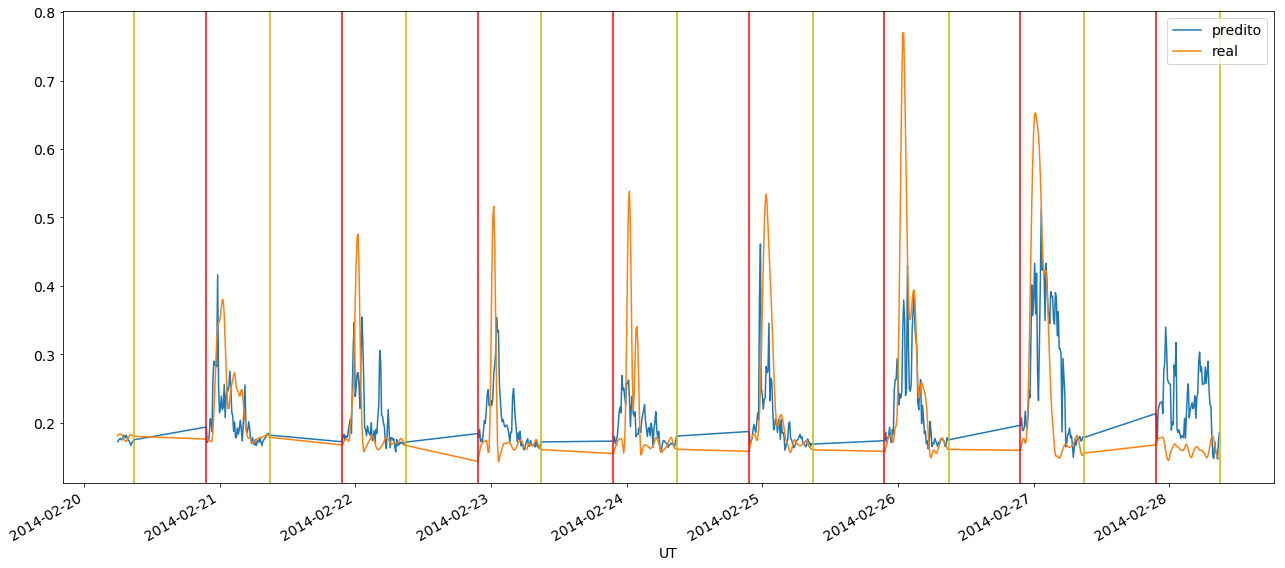

In [12]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.002356
O erro quadrático total foi: 1.892272
O maior erro por previsão foi: 0.358086
O erro relativo foi: 13.032844%
O número de verdadeiros negativos foi: 936
O número de verdadeiros positivos foi: 274
O número de falsos negativos foi: 79
O número de falsos positivos foi: 231
O POD foi: 0.776204
O FAR foi: 0.457426
A ACC foi: 0.796053
O kappa foi: 0.059400

Error for the time series sample:
O erro quadrático médio foi: 0.008460
O erro quadrático total foi: 2.180494
O maior erro por previsão foi: 0.455484
O erro relativo foi: 26.410551%
O número de verdadeiros negativos foi: 235
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 174
O POD foi: 0.862745
O FAR foi: 0.568627
A ACC foi: 0.653025
O kappa foi: 0.088344


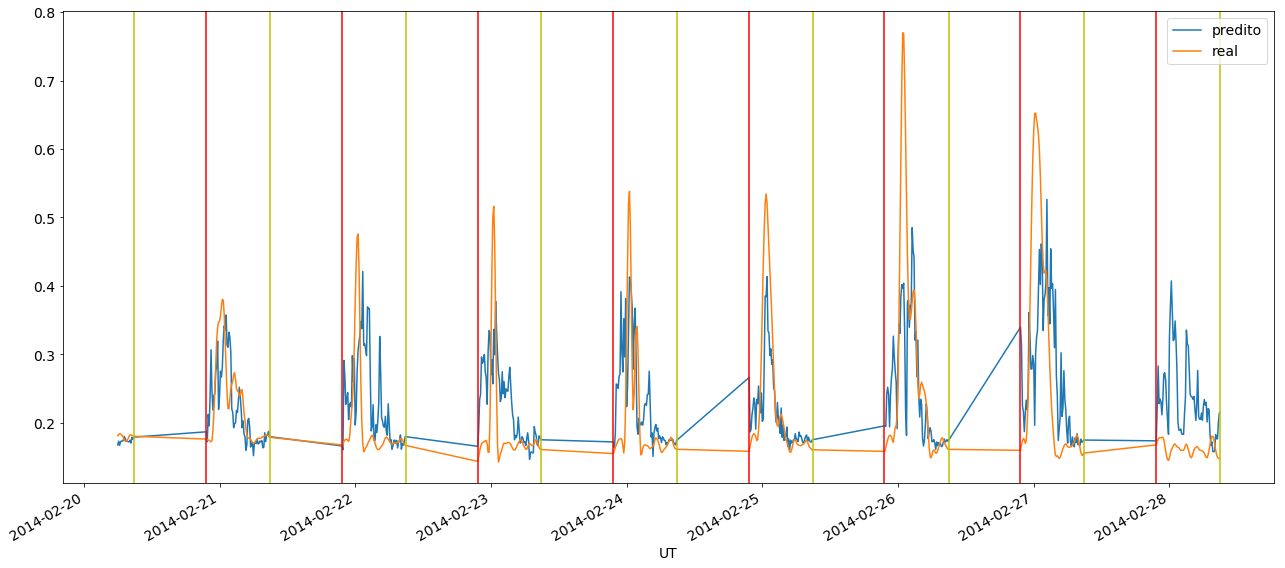

In [13]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt'], 's4')

O erro quadrático médio foi: 0.001899
O erro quadrático total foi: 1.699040
O maior erro por previsão foi: 0.265662
O erro relativo foi: 12.423002%
O número de verdadeiros negativos foi: 947
O número de verdadeiros positivos foi: 292
O número de falsos negativos foi: 61
O número de falsos positivos foi: 220
O POD foi: 0.827195
O FAR foi: 0.429688
A ACC foi: 0.815132
O kappa foi: 0.052808

Error for the time series sample:
O erro quadrático médio foi: 0.008222
O erro quadrático total foi: 2.149538
O maior erro por previsão foi: 0.493053
O erro relativo foi: 23.645668%
O número de verdadeiros negativos foi: 280
O número de verdadeiros positivos foi: 130
O número de falsos negativos foi: 23
O número de falsos positivos foi: 129
O POD foi: 0.849673
O FAR foi: 0.498069
A ACC foi: 0.729537
O kappa foi: 0.073486


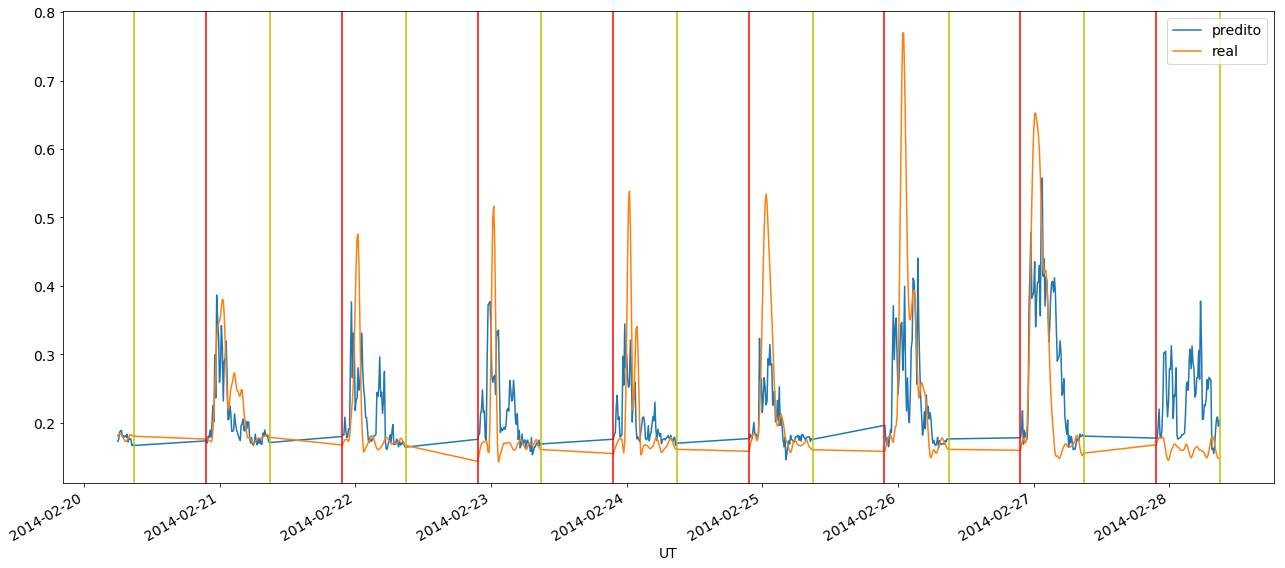

In [14]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2'], 's4')

O erro quadrático médio foi: 0.004731
O erro quadrático total foi: 2.681614
O maior erro por previsão foi: 0.409794
O erro relativo foi: 19.172867%
O número de verdadeiros negativos foi: 893
O número de verdadeiros positivos foi: 190
O número de falsos negativos foi: 163
O número de falsos positivos foi: 274
O POD foi: 0.538244
O FAR foi: 0.590517
A ACC foi: 0.712500
O kappa foi: 0.085535

Error for the time series sample:
O erro quadrático médio foi: 0.013283
O erro quadrático total foi: 2.732175
O maior erro por previsão foi: 0.581378
O erro relativo foi: 26.716916%
O número de verdadeiros negativos foi: 273
O número de verdadeiros positivos foi: 95
O número de falsos negativos foi: 58
O número de falsos positivos foi: 136
O POD foi: 0.620915
O FAR foi: 0.588745
A ACC foi: 0.654804
O kappa foi: 0.091039


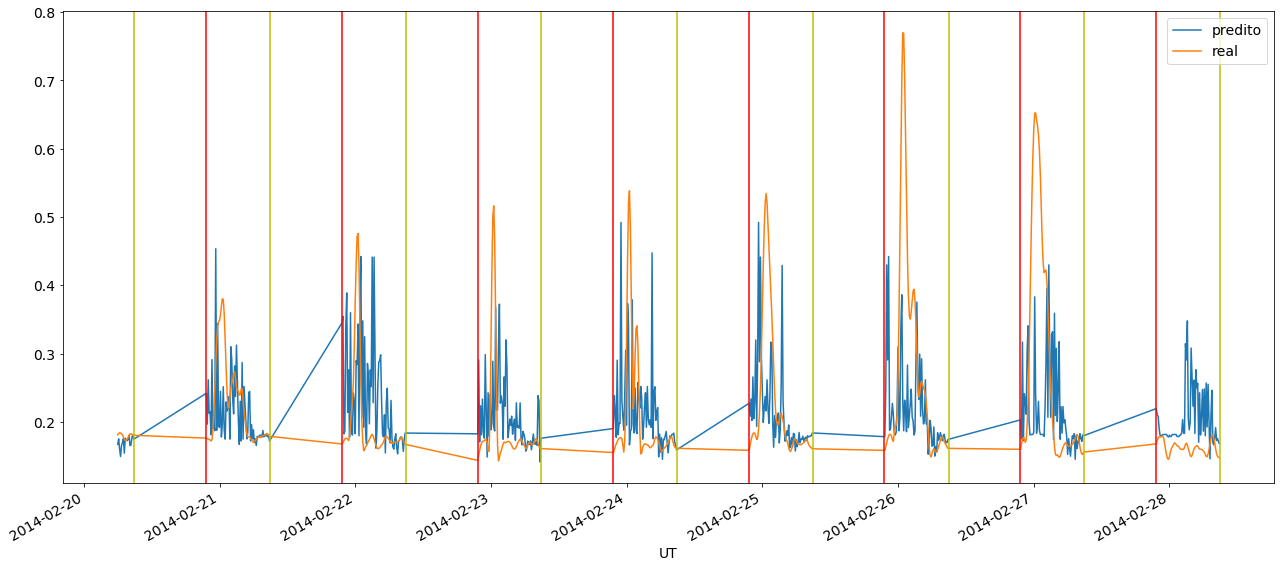

In [15]:
generate_and_avaliate_model(df, ['vtec',], 's4')

O erro quadrático médio foi: 0.003429
O erro quadrático total foi: 2.283144
O maior erro por previsão foi: 0.383761
O erro relativo foi: 16.809295%
O número de verdadeiros negativos foi: 861
O número de verdadeiros positivos foi: 252
O número de falsos negativos foi: 101
O número de falsos positivos foi: 306
O POD foi: 0.713881
O FAR foi: 0.548387
A ACC foi: 0.732237
O kappa foi: 0.071015

Error for the time series sample:
O erro quadrático médio foi: 0.009767
O erro quadrático total foi: 2.342877
O maior erro por previsão foi: 0.496358
O erro relativo foi: 27.078753%
O número de verdadeiros negativos foi: 251
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 158
O POD foi: 0.836601
O FAR foi: 0.552448
A ACC foi: 0.674377
O kappa foi: 0.083899


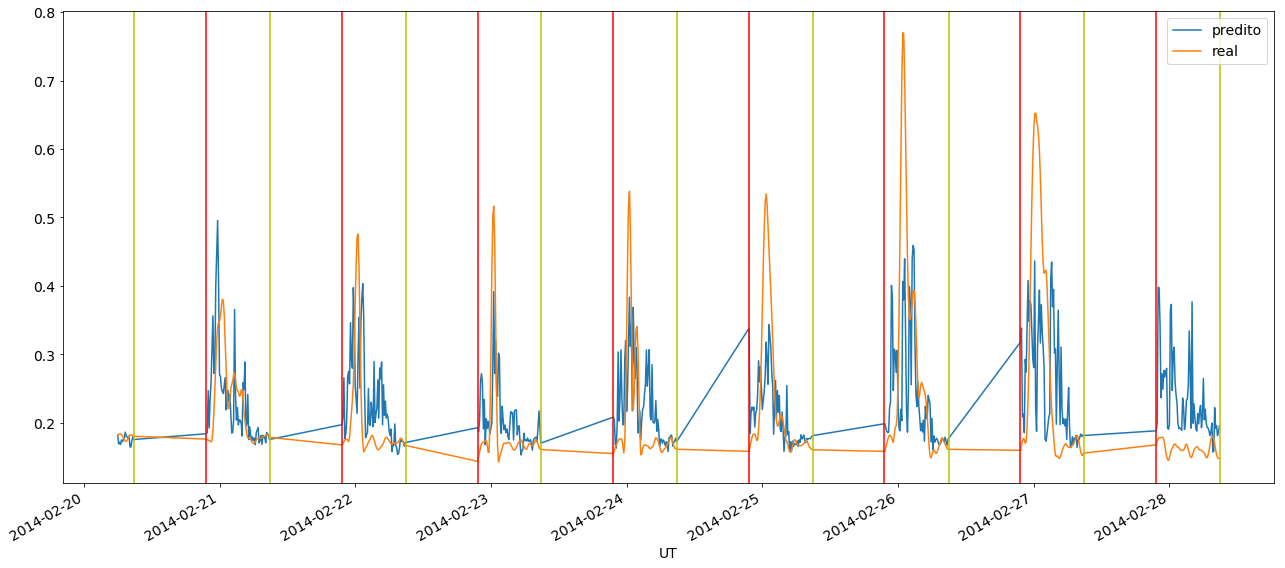

In [16]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2'], 's4')

O erro quadrático médio foi: 0.002246
O erro quadrático total foi: 1.847873
O maior erro por previsão foi: 0.328370
O erro relativo foi: 13.898938%
O número de verdadeiros negativos foi: 935
O número de verdadeiros positivos foi: 253
O número de falsos negativos foi: 100
O número de falsos positivos foi: 232
O POD foi: 0.716714
O FAR foi: 0.478351
A ACC foi: 0.781579
O kappa foi: 0.065874

Error for the time series sample:
O erro quadrático médio foi: 0.010780
O erro quadrático total foi: 2.461388
O maior erro por previsão foi: 0.512927
O erro relativo foi: 21.682527%
O número de verdadeiros negativos foi: 322
O número de verdadeiros positivos foi: 102
O número de falsos negativos foi: 51
O número de falsos positivos foi: 87
O POD foi: 0.666667
O FAR foi: 0.460317
A ACC foi: 0.754448
O kappa foi: 0.080090


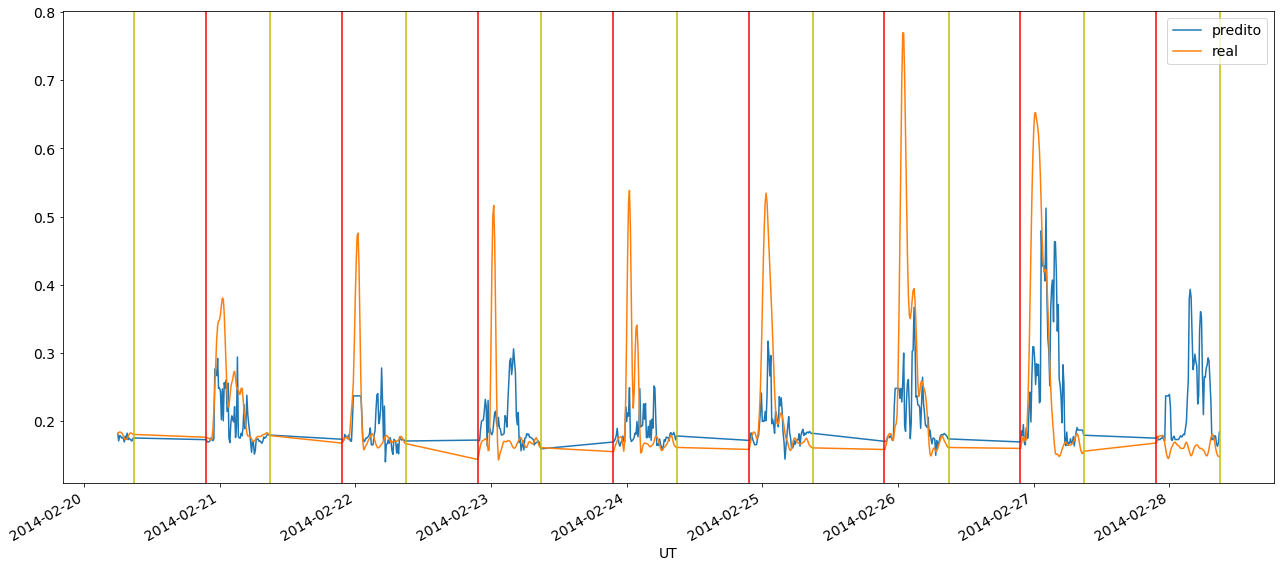

In [17]:
generate_and_avaliate_model(df, ['vtec', 'gvtec1', 'gvtec2'], 's4')

O erro quadrático médio foi: 0.002471
O erro quadrático total foi: 1.937929
O maior erro por previsão foi: 0.331754
O erro relativo foi: 13.864779%
O número de verdadeiros negativos foi: 913
O número de verdadeiros positivos foi: 275
O número de falsos negativos foi: 78
O número de falsos positivos foi: 254
O POD foi: 0.779037
O FAR foi: 0.480151
A ACC foi: 0.781579
O kappa foi: 0.061056

Error for the time series sample:
O erro quadrático médio foi: 0.008744
O erro quadrático total foi: 2.216740
O maior erro por previsão foi: 0.448625
O erro relativo foi: 27.090577%
O número de verdadeiros negativos foi: 222
O número de verdadeiros positivos foi: 130
O número de falsos negativos foi: 23
O número de falsos positivos foi: 187
O POD foi: 0.849673
O FAR foi: 0.589905
A ACC foi: 0.626335
O kappa foi: 0.093135


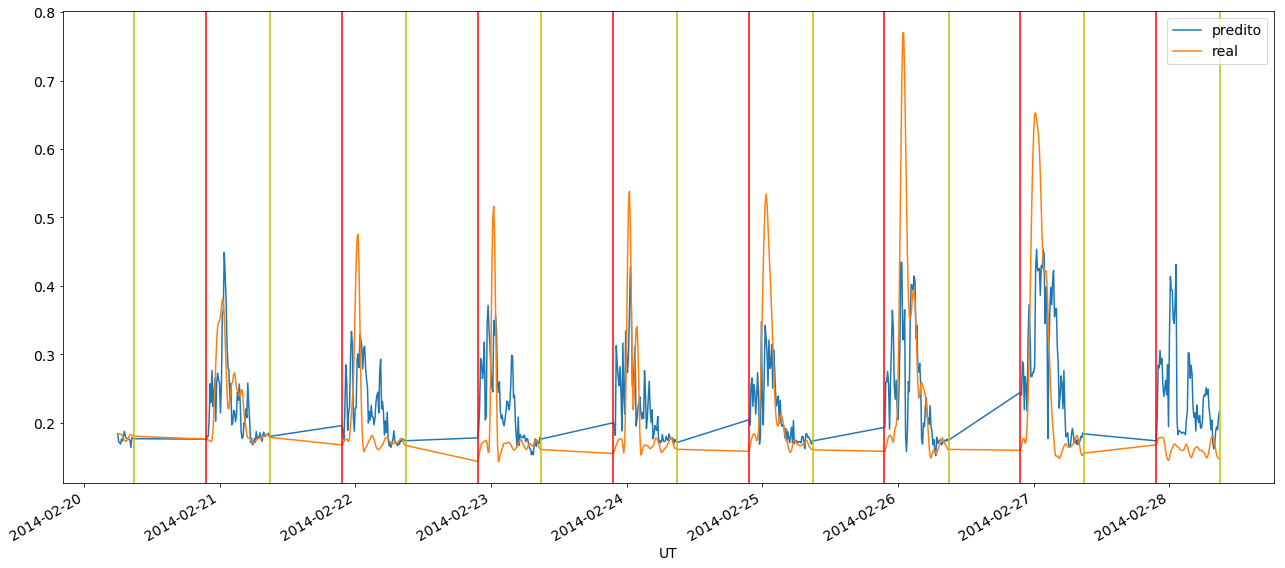

In [18]:
generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt'], 's4')

O erro quadrático médio foi: 0.001918
O erro quadrático total foi: 1.707338
O maior erro por previsão foi: 0.340087
O erro relativo foi: 11.680227%
O número de verdadeiros negativos foi: 986
O número de verdadeiros positivos foi: 283
O número de falsos negativos foi: 70
O número de falsos positivos foi: 181
O POD foi: 0.801700
O FAR foi: 0.390086
A ACC foi: 0.834868
O kappa foi: 0.052044

Error for the time series sample:
O erro quadrático médio foi: 0.008057
O erro quadrático total foi: 2.127920
O maior erro por previsão foi: 0.466448
O erro relativo foi: 24.528644%
O número de verdadeiros negativos foi: 242
O número de verdadeiros positivos foi: 137
O número de falsos negativos foi: 16
O número de falsos positivos foi: 167
O POD foi: 0.895425
O FAR foi: 0.549342
A ACC foi: 0.674377
O kappa foi: 0.084697


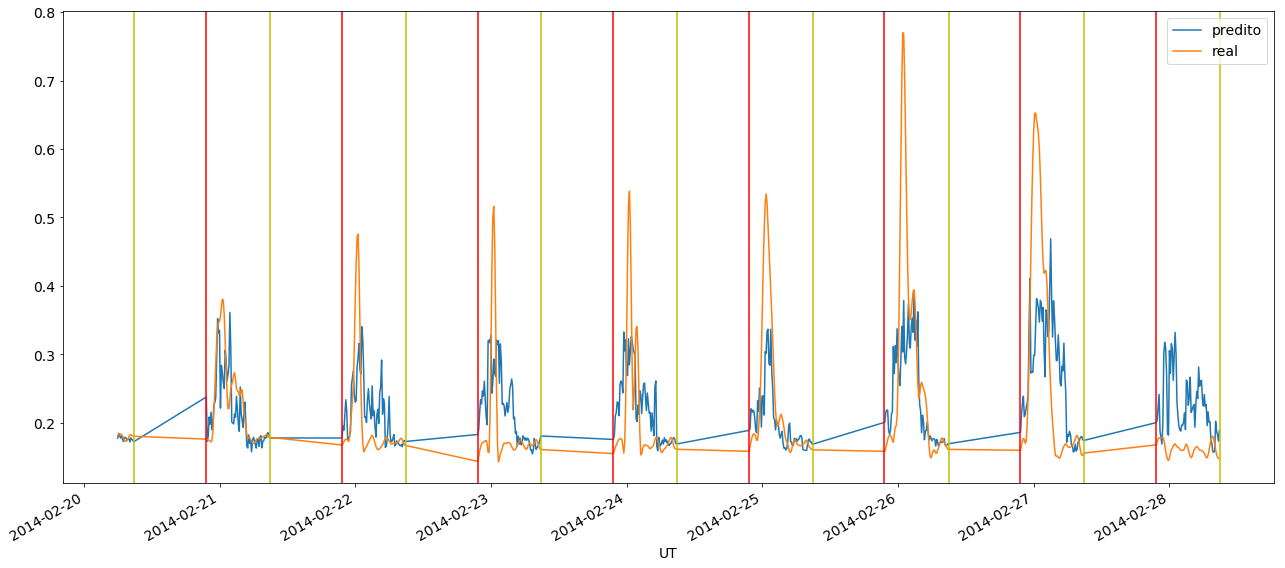

In [40]:
generate_and_avaliate_model(df, original + tempo, 's4')

O erro quadrático médio foi: 0.001838
O erro quadrático total foi: 1.671591
O maior erro por previsão foi: 0.324549
O erro relativo foi: 11.356137%
O número de verdadeiros negativos foi: 991
O número de verdadeiros positivos foi: 282
O número de falsos negativos foi: 71
O número de falsos positivos foi: 176
O POD foi: 0.798867
O FAR foi: 0.384279
A ACC foi: 0.837500
O kappa foi: 0.051936

Error for the time series sample:
O erro quadrático médio foi: 0.007372
O erro quadrático total foi: 2.035456
O maior erro por previsão foi: 0.411496
O erro relativo foi: 22.686120%
O número de verdadeiros negativos foi: 257
O número de verdadeiros positivos foi: 136
O número de falsos negativos foi: 17
O número de falsos positivos foi: 152
O POD foi: 0.888889
O FAR foi: 0.527778
A ACC foi: 0.699288
O kappa foi: 0.079283


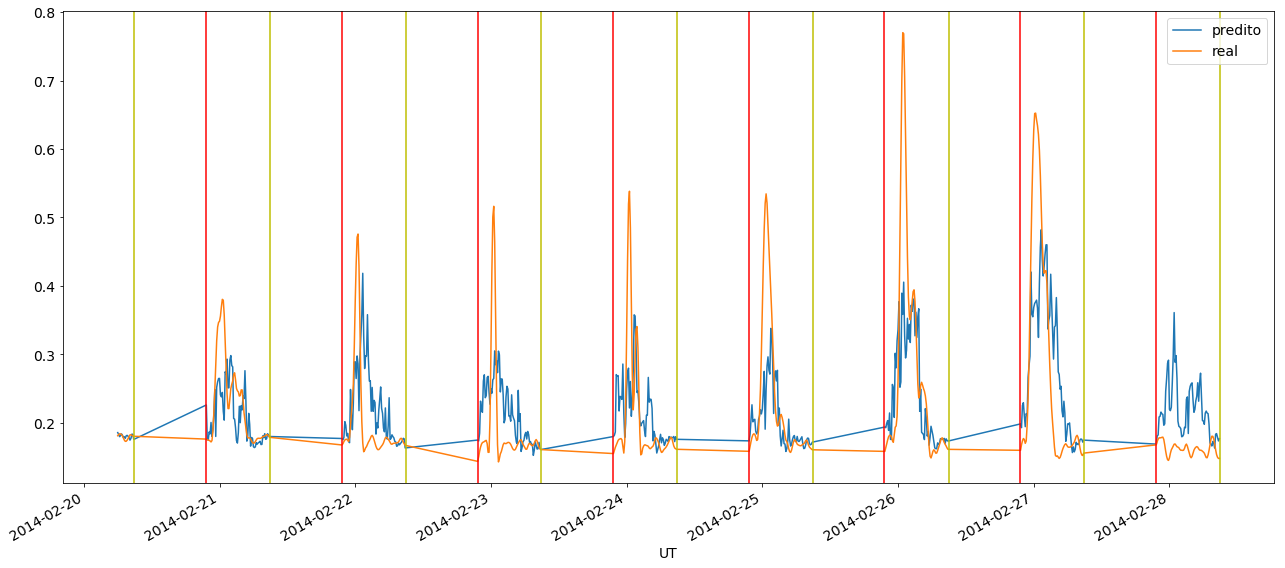

In [19]:
generate_and_avaliate_model(df, original + lag, 's4')

O erro quadrático médio foi: 0.001835
O erro quadrático total foi: 1.670152
O maior erro por previsão foi: 0.275990
O erro relativo foi: 11.689097%
O número de verdadeiros negativos foi: 965
O número de verdadeiros positivos foi: 279
O número de falsos negativos foi: 74
O número de falsos positivos foi: 202
O POD foi: 0.790368
O FAR foi: 0.419958
A ACC foi: 0.818421
O kappa foi: 0.055301

Error for the time series sample:
O erro quadrático médio foi: 0.007498
O erro quadrático total foi: 2.052774
O maior erro por previsão foi: 0.462464
O erro relativo foi: 22.756030%
O número de verdadeiros negativos foi: 263
O número de verdadeiros positivos foi: 129
O número de falsos negativos foi: 24
O número de falsos positivos foi: 146
O POD foi: 0.843137
O FAR foi: 0.530909
A ACC foi: 0.697509
O kappa foi: 0.079615


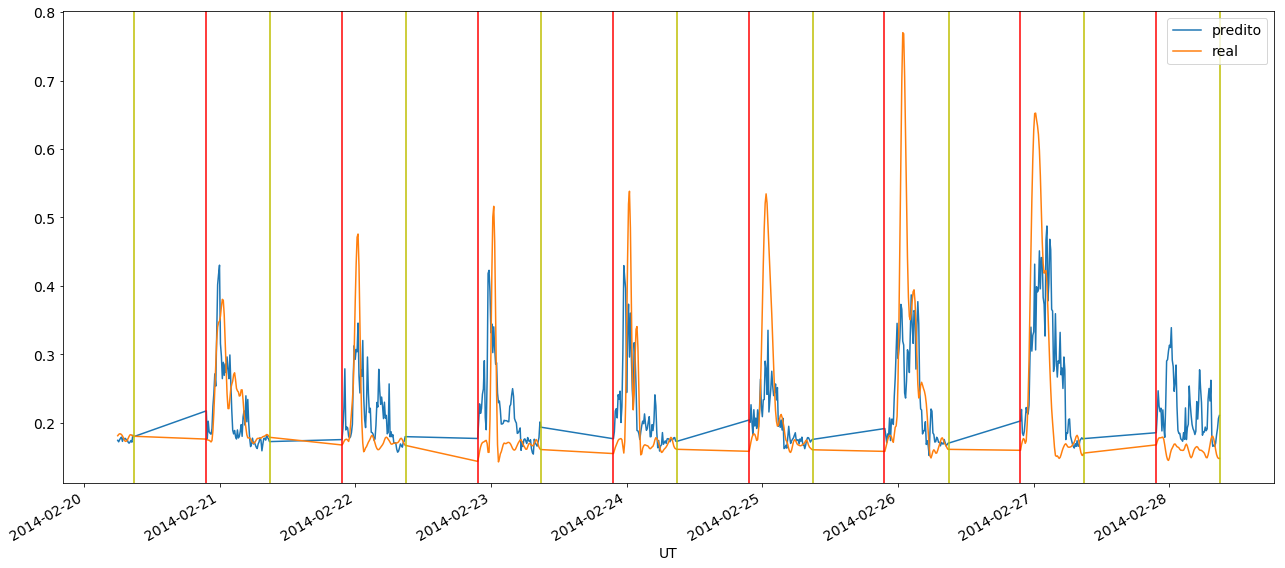

In [20]:
generate_and_avaliate_model(df, original + ['gvtec1_dt_lag_9',], 's4')

O erro quadrático médio foi: 0.001841
O erro quadrático total foi: 1.672612
O maior erro por previsão foi: 0.354119
O erro relativo foi: 11.255028%
O número de verdadeiros negativos foi: 998
O número de verdadeiros positivos foi: 287
O número de falsos negativos foi: 66
O número de falsos positivos foi: 169
O POD foi: 0.813031
O FAR foi: 0.370614
A ACC foi: 0.845395
O kappa foi: 0.049503

Error for the time series sample:
O erro quadrático médio foi: 0.007565
O erro quadrático total foi: 2.061956
O maior erro por previsão foi: 0.471737
O erro relativo foi: 23.245681%
O número de verdadeiros negativos foi: 257
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 152
O POD foi: 0.869281
O FAR foi: 0.533333
A ACC foi: 0.693950
O kappa foi: 0.080280


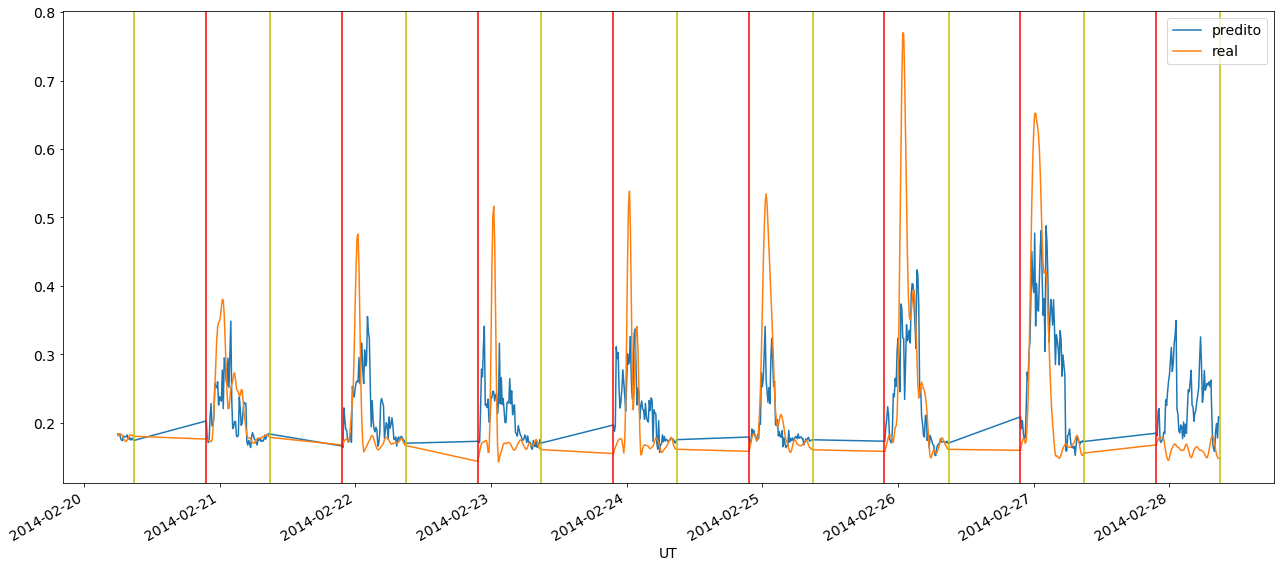

In [21]:
generate_and_avaliate_model(df, original + ['gvtec2_dt_lag_20',], 's4')

O erro quadrático médio foi: 0.001306
O erro quadrático total foi: 1.409111
O maior erro por previsão foi: 0.236426
O erro relativo foi: 9.561116%
O número de verdadeiros negativos foi: 1002
O número de verdadeiros positivos foi: 302
O número de falsos negativos foi: 51
O número de falsos positivos foi: 165
O POD foi: 0.855524
O FAR foi: 0.353319
A ACC foi: 0.857895
O kappa foi: 0.043686

Error for the time series sample:
O erro quadrático médio foi: 0.008775
O erro quadrático total foi: 2.220669
O maior erro por previsão foi: 0.430740
O erro relativo foi: 22.527980%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 123
O POD foi: 0.836601
O FAR foi: 0.490040
A ACC foi: 0.736655
O kappa foi: 0.072485


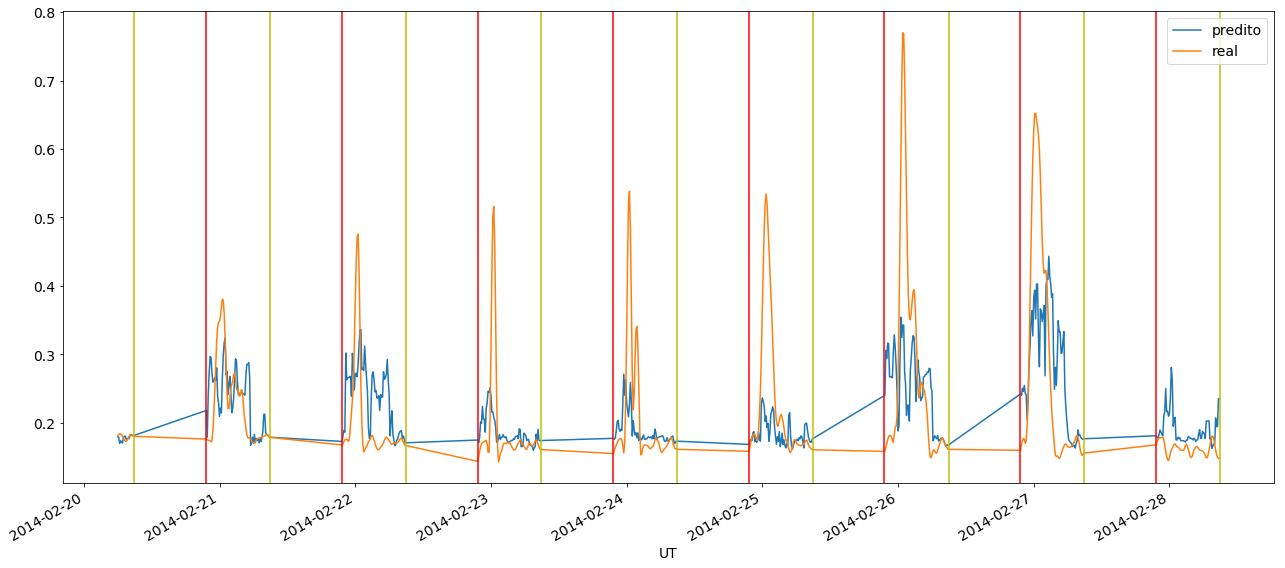

In [22]:
generate_and_avaliate_model(df, original + mdv1, 's4')

O erro quadrático médio foi: 0.001235
O erro quadrático total foi: 1.370277
O maior erro por previsão foi: 0.268485
O erro relativo foi: 9.442631%
O número de verdadeiros negativos foi: 1006
O número de verdadeiros positivos foi: 296
O número de falsos negativos foi: 57
O número de falsos positivos foi: 161
O POD foi: 0.838527
O FAR foi: 0.352298
A ACC foi: 0.856579
O kappa foi: 0.045446

Error for the time series sample:
O erro quadrático médio foi: 0.008666
O erro quadrático total foi: 2.206844
O maior erro por previsão foi: 0.491318
O erro relativo foi: 20.595691%
O número de verdadeiros negativos foi: 303
O número de verdadeiros positivos foi: 116
O número de falsos negativos foi: 37
O número de falsos positivos foi: 106
O POD foi: 0.758170
O FAR foi: 0.477477
A ACC foi: 0.745552
O kappa foi: 0.074426


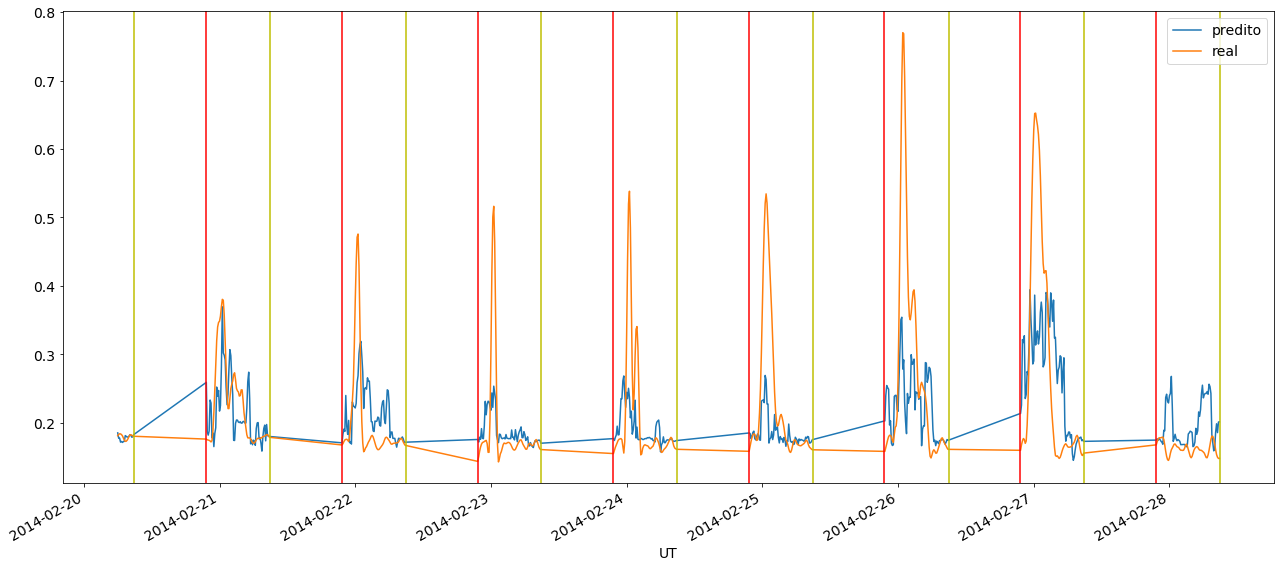

In [23]:
generate_and_avaliate_model(df, original + mdv2, 's4')

O erro quadrático médio foi: 0.001658
O erro quadrático total foi: 1.587441
O maior erro por previsão foi: 0.330594
O erro relativo foi: 10.812633%
O número de verdadeiros negativos foi: 995
O número de verdadeiros positivos foi: 292
O número de falsos negativos foi: 61
O número de falsos positivos foi: 172
O POD foi: 0.827195
O FAR foi: 0.370690
A ACC foi: 0.846711
O kappa foi: 0.048009

Error for the time series sample:
O erro quadrático médio foi: 0.006969
O erro quadrático total foi: 1.978983
O maior erro por previsão foi: 0.396523
O erro relativo foi: 23.697576%
O número de verdadeiros negativos foi: 251
O número de verdadeiros positivos foi: 134
O número de falsos negativos foi: 19
O número de falsos positivos foi: 158
O POD foi: 0.875817
O FAR foi: 0.541096
A ACC foi: 0.685053
O kappa foi: 0.082132


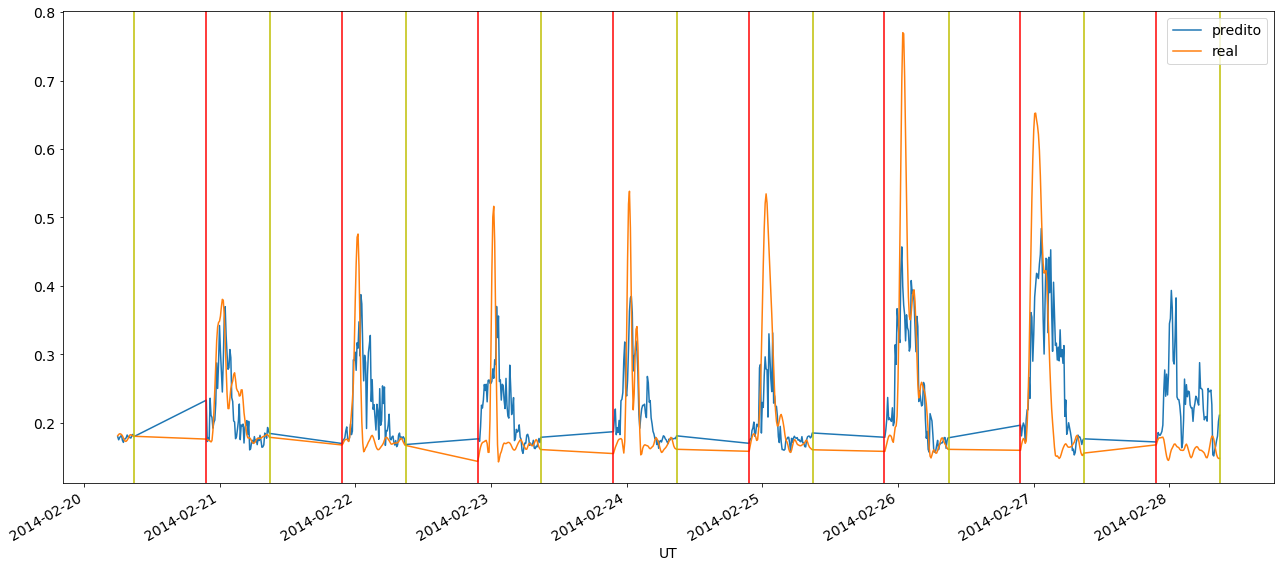

In [24]:
generate_and_avaliate_model(df, original + tempo + lag, 's4')

O erro quadrático médio foi: 0.001240
O erro quadrático total foi: 1.372880
O maior erro por previsão foi: 0.235837
O erro relativo foi: 9.425251%
O número de verdadeiros negativos foi: 1018
O número de verdadeiros positivos foi: 290
O número de falsos negativos foi: 63
O número de falsos positivos foi: 149
O POD foi: 0.821530
O FAR foi: 0.339408
A ACC foi: 0.860526
O kappa foi: 0.046461

Error for the time series sample:
O erro quadrático médio foi: 0.008457
O erro quadrático total foi: 2.180060
O maior erro por previsão foi: 0.440627
O erro relativo foi: 20.489308%
O número de verdadeiros negativos foi: 315
O número de verdadeiros positivos foi: 106
O número de falsos negativos foi: 47
O número de falsos positivos foi: 94
O POD foi: 0.692810
O FAR foi: 0.470000
A ACC foi: 0.749110
O kappa foi: 0.078422


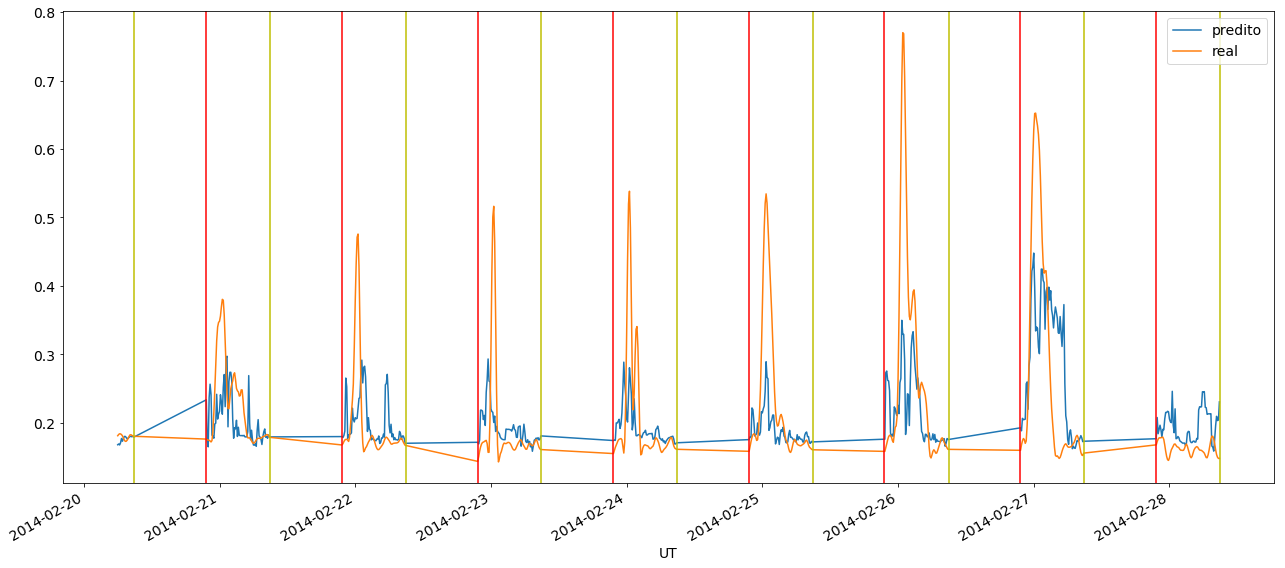

In [25]:
generate_and_avaliate_model(df, original + tempo + mdv2, 's4')

O erro quadrático médio foi: 0.001159
O erro quadrático total foi: 1.327541
O maior erro por previsão foi: 0.251258
O erro relativo foi: 8.937739%
O número de verdadeiros negativos foi: 1027
O número de verdadeiros positivos foi: 302
O número de falsos negativos foi: 51
O número de falsos positivos foi: 140
O POD foi: 0.855524
O FAR foi: 0.316742
A ACC foi: 0.874342
O kappa foi: 0.040970

Error for the time series sample:
O erro quadrático médio foi: 0.009696
O erro quadrático total foi: 2.334383
O maior erro por previsão foi: 0.383690
O erro relativo foi: 24.386331%
O número de verdadeiros negativos foi: 280
O número de verdadeiros positivos foi: 116
O número de falsos negativos foi: 37
O número de falsos positivos foi: 129
O POD foi: 0.758170
O FAR foi: 0.526531
A ACC foi: 0.704626
O kappa foi: 0.080179


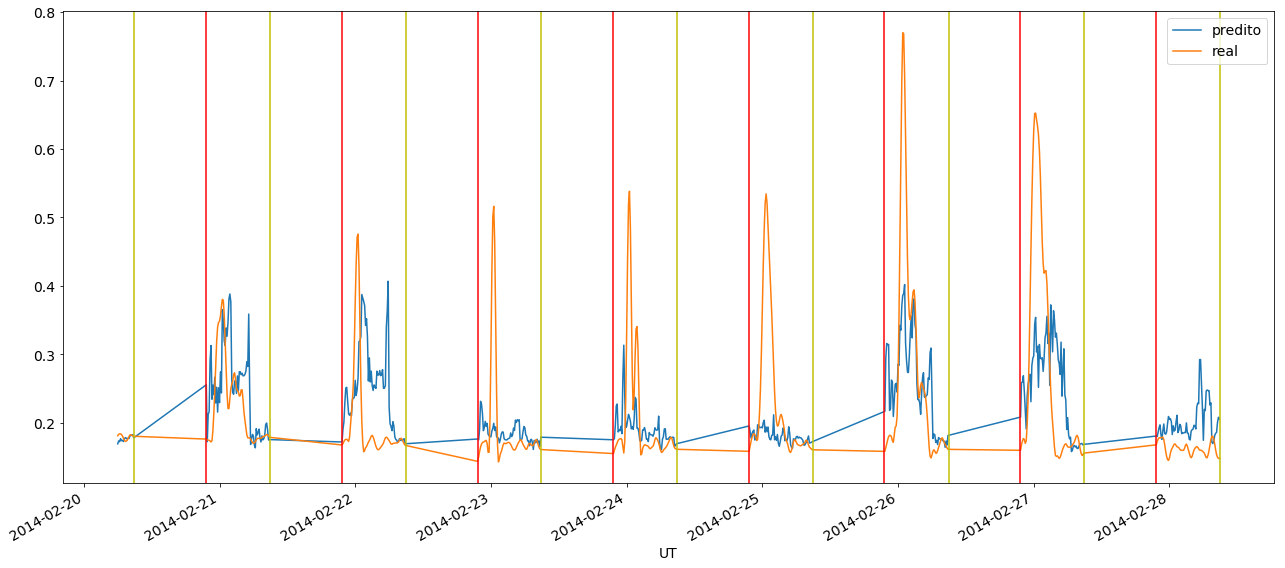

In [26]:
generate_and_avaliate_model(df, original + tempo + mdv2 + lag, 's4')

O erro quadrático médio foi: 0.002455
O erro quadrático total foi: 1.931822
O maior erro por previsão foi: 0.349837
O erro relativo foi: 14.293379%
O número de verdadeiros negativos foi: 920
O número de verdadeiros positivos foi: 262
O número de falsos negativos foi: 91
O número de falsos positivos foi: 247
O POD foi: 0.742210
O FAR foi: 0.485265
A ACC foi: 0.777632
O kappa foi: 0.064246

Error for the time series sample:
O erro quadrático médio foi: 0.008512
O erro quadrático total foi: 2.187216
O maior erro por previsão foi: 0.410945
O erro relativo foi: 24.621537%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 131
O POD foi: 0.823529
O FAR foi: 0.509728
A ACC foi: 0.718861
O kappa foi: 0.076025


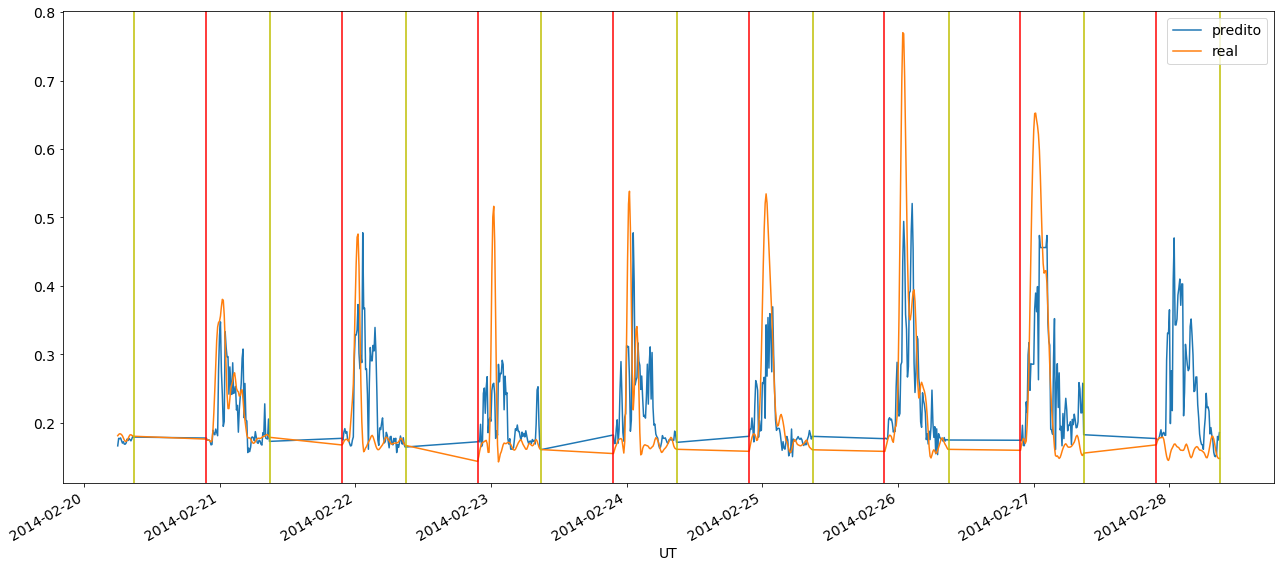

In [27]:
generate_and_avaliate_model(df, ['vtec',] + lag, 's4')

O erro quadrático médio foi: 0.003707
O erro quadrático total foi: 2.373648
O maior erro por previsão foi: 0.402253
O erro relativo foi: 17.900117%
O número de verdadeiros negativos foi: 866
O número de verdadeiros positivos foi: 240
O número de falsos negativos foi: 113
O número de falsos positivos foi: 301
O POD foi: 0.679887
O FAR foi: 0.556377
A ACC foi: 0.727632
O kappa foi: 0.073623

Error for the time series sample:
O erro quadrático médio foi: 0.010994
O erro quadrático total foi: 2.485729
O maior erro por previsão foi: 0.517952
O erro relativo foi: 31.825502%
O número de verdadeiros negativos foi: 213
O número de verdadeiros positivos foi: 124
O número de falsos negativos foi: 29
O número de falsos positivos foi: 196
O POD foi: 0.810458
O FAR foi: 0.612500
A ACC foi: 0.599644
O kappa foi: 0.096507


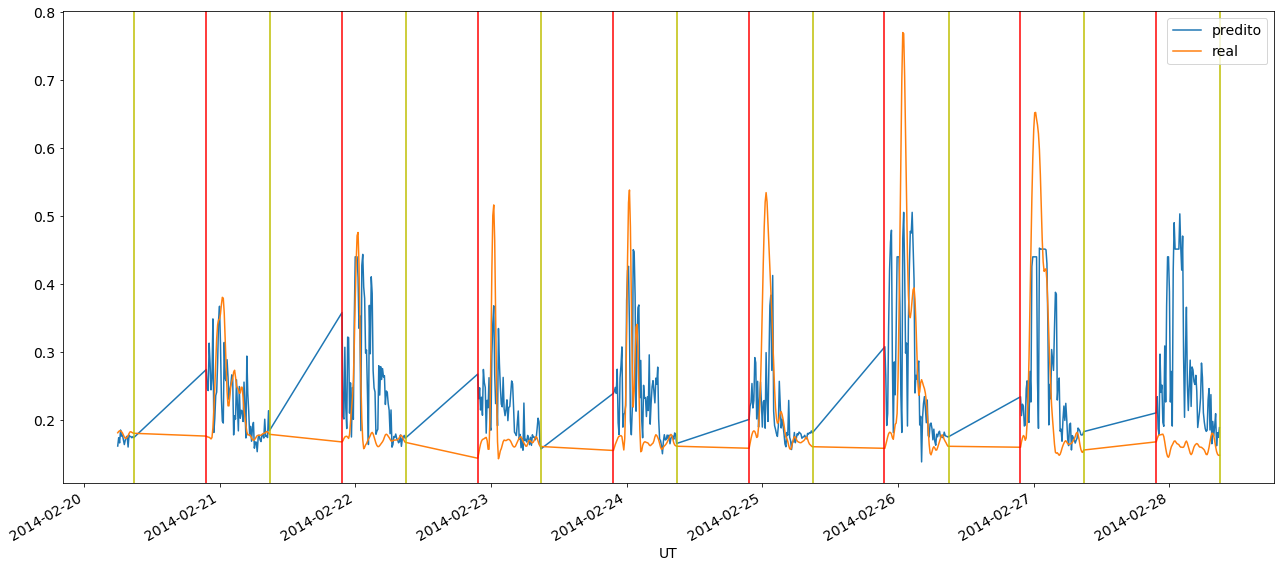

In [28]:
generate_and_avaliate_model(df, ['vtec', 'gvtec1_dt_lag_9'], 's4')

O erro quadrático médio foi: 0.003178
O erro quadrático total foi: 2.197703
O maior erro por previsão foi: 0.372808
O erro relativo foi: 16.271977%
O número de verdadeiros negativos foi: 900
O número de verdadeiros positivos foi: 260
O número de falsos negativos foi: 93
O número de falsos positivos foi: 267
O POD foi: 0.736544
O FAR foi: 0.506641
A ACC foi: 0.763158
O kappa foi: 0.066274

Error for the time series sample:
O erro quadrático médio foi: 0.008452
O erro quadrático total foi: 2.179391
O maior erro por previsão foi: 0.416869
O erro relativo foi: 23.767195%
O número de verdadeiros negativos foi: 281
O número de verdadeiros positivos foi: 114
O número de falsos negativos foi: 39
O número de falsos positivos foi: 128
O POD foi: 0.745098
O FAR foi: 0.528926
A ACC foi: 0.702847
O kappa foi: 0.080898


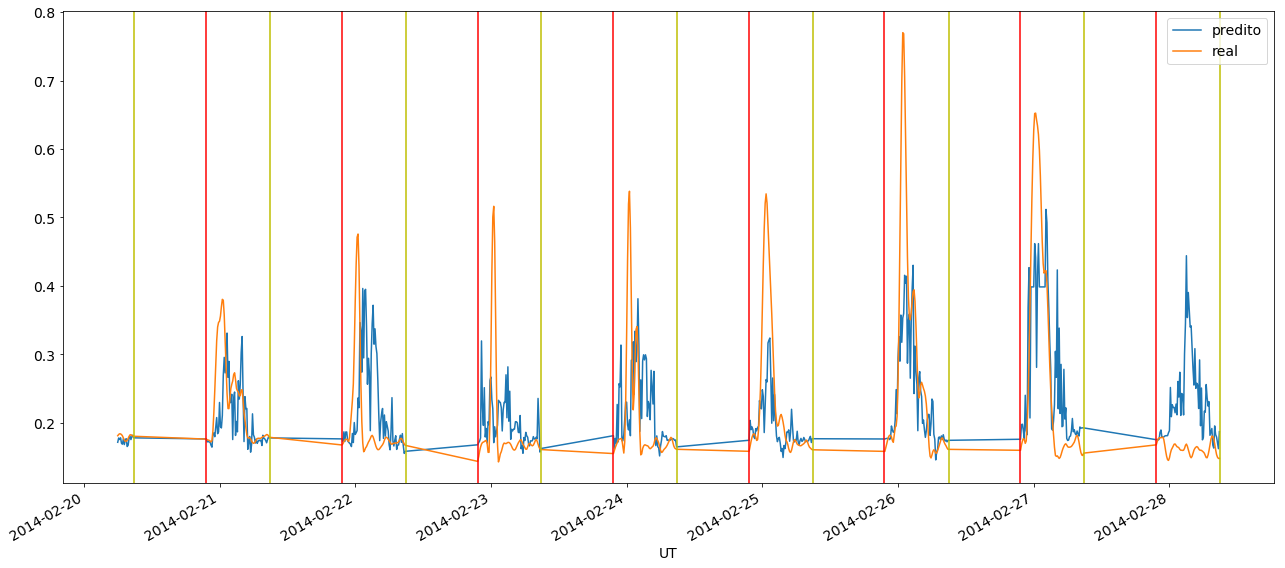

In [29]:
generate_and_avaliate_model(df, ['vtec', 'gvtec2_dt_lag_20'], 's4')

O erro quadrático médio foi: 0.004164
O erro quadrático total foi: 2.515913
O maior erro por previsão foi: 0.414959
O erro relativo foi: 18.221788%
O número de verdadeiros negativos foi: 913
O número de verdadeiros positivos foi: 214
O número de falsos negativos foi: 139
O número de falsos positivos foi: 254
O POD foi: 0.606232
O FAR foi: 0.542735
A ACC foi: 0.741447
O kappa foi: 0.078455

Error for the time series sample:
O erro quadrático médio foi: 0.012491
O erro quadrático total foi: 2.649510
O maior erro por previsão foi: 0.545881
O erro relativo foi: 29.687987%
O número de verdadeiros negativos foi: 262
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 147
O POD foi: 0.830065
O FAR foi: 0.536496
A ACC foi: 0.692171
O kappa foi: 0.080676


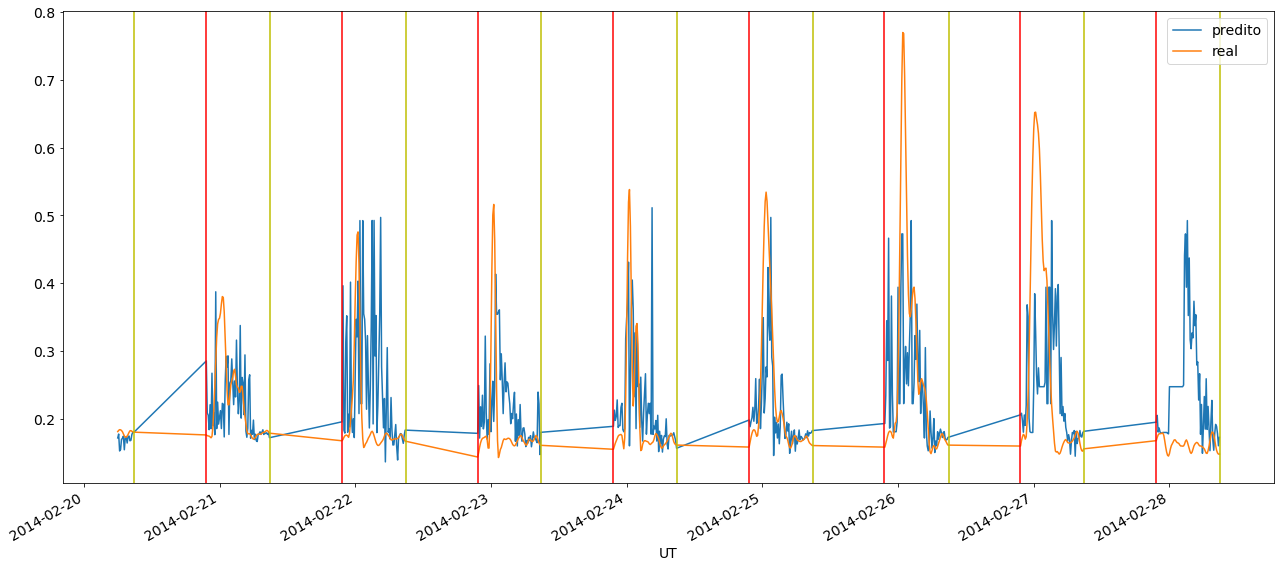

In [30]:
generate_and_avaliate_model(df, ['vtec',] + tempo, 's4')

O erro quadrático médio foi: 0.001960
O erro quadrático total foi: 1.726180
O maior erro por previsão foi: 0.296246
O erro relativo foi: 10.442058%
O número de verdadeiros negativos foi: 1011
O número de verdadeiros positivos foi: 283
O número de falsos negativos foi: 70
O número de falsos positivos foi: 156
O POD foi: 0.801700
O FAR foi: 0.355353
A ACC foi: 0.851316
O kappa foi: 0.049739

Error for the time series sample:
O erro quadrático médio foi: 0.011658
O erro quadrático total foi: 2.559626
O maior erro por previsão foi: 0.598194
O erro relativo foi: 20.449810%
O número de verdadeiros negativos foi: 332
O número de verdadeiros positivos foi: 82
O número de falsos negativos foi: 71
O número de falsos positivos foi: 77
O POD foi: 0.535948
O FAR foi: 0.484277
A ACC foi: 0.736655
O kappa foi: 0.094623


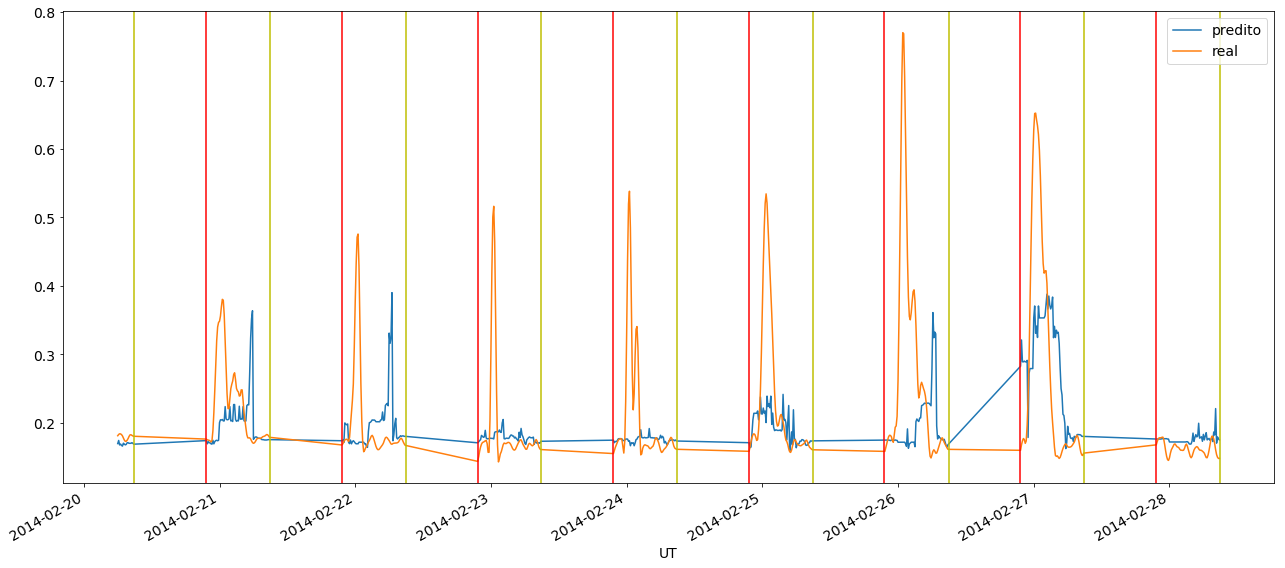

In [32]:
generate_and_avaliate_model(df, ['vtec',] + tempo + mdv1, 's4')

O erro quadrático médio foi: 0.001848
O erro quadrático total foi: 1.675955
O maior erro por previsão foi: 0.323902
O erro relativo foi: 10.266891%
O número de verdadeiros negativos foi: 1007
O número de verdadeiros positivos foi: 289
O número de falsos negativos foi: 64
O número de falsos positivos foi: 160
O POD foi: 0.818697
O FAR foi: 0.356347
A ACC foi: 0.852632
O kappa foi: 0.047909

Error for the time series sample:
O erro quadrático médio foi: 0.011663
O erro quadrático total foi: 2.560220
O maior erro por previsão foi: 0.569091
O erro relativo foi: 26.597306%
O número de verdadeiros negativos foi: 267
O número de verdadeiros positivos foi: 110
O número de falsos negativos foi: 43
O número de falsos positivos foi: 142
O POD foi: 0.718954
O FAR foi: 0.563492
A ACC foi: 0.670819
O kappa foi: 0.085805


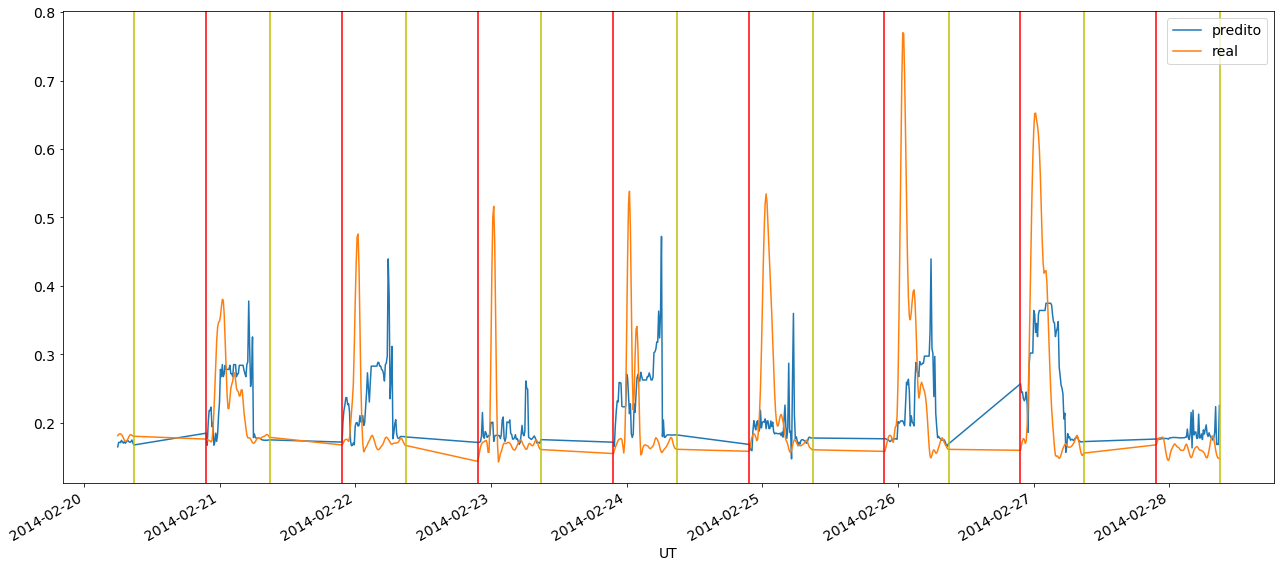

In [33]:
generate_and_avaliate_model(df, ['vtec',] + tempo + mdv2, 's4')

O erro quadrático médio foi: 0.001802
O erro quadrático total foi: 1.654860
O maior erro por previsão foi: 0.275527
O erro relativo foi: 10.260227%
O número de verdadeiros negativos foi: 1025
O número de verdadeiros positivos foi: 276
O número de falsos negativos foi: 77
O número de falsos positivos foi: 142
O POD foi: 0.781870
O FAR foi: 0.339713
A ACC foi: 0.855921
O kappa foi: 0.051124

Error for the time series sample:
O erro quadrático médio foi: 0.011786
O erro quadrático total foi: 2.573689
O maior erro por previsão foi: 0.589305
O erro relativo foi: 22.712259%
O número de verdadeiros negativos foi: 327
O número de verdadeiros positivos foi: 70
O número de falsos negativos foi: 83
O número de falsos positivos foi: 82
O POD foi: 0.457516
O FAR foi: 0.539474
A ACC foi: 0.706406
O kappa foi: 0.104105


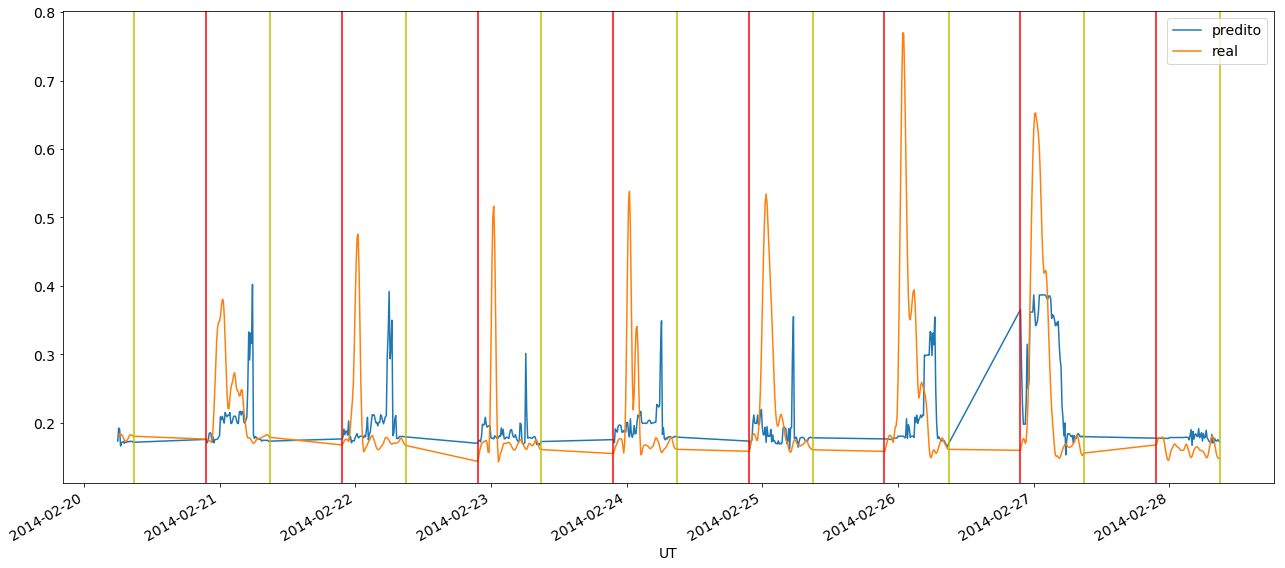

In [34]:
generate_and_avaliate_model(df, ['vtec',] + tempo + mdv1 + mdv2, 's4')

O erro quadrático médio foi: 0.002382
O erro quadrático total foi: 1.902756
O maior erro por previsão foi: 0.330157
O erro relativo foi: 13.890796%
O número de verdadeiros negativos foi: 945
O número de verdadeiros positivos foi: 265
O número de falsos negativos foi: 88
O número de falsos positivos foi: 222
O POD foi: 0.750708
O FAR foi: 0.455852
A ACC foi: 0.796053
O kappa foi: 0.061457

Error for the time series sample:
O erro quadrático médio foi: 0.008320
O erro quadrático total foi: 2.162404
O maior erro por previsão foi: 0.445708
O erro relativo foi: 24.153312%
O número de verdadeiros negativos foi: 280
O número de verdadeiros positivos foi: 124
O número de falsos negativos foi: 29
O número de falsos positivos foi: 129
O POD foi: 0.810458
O FAR foi: 0.509881
A ACC foi: 0.718861
O kappa foi: 0.076354


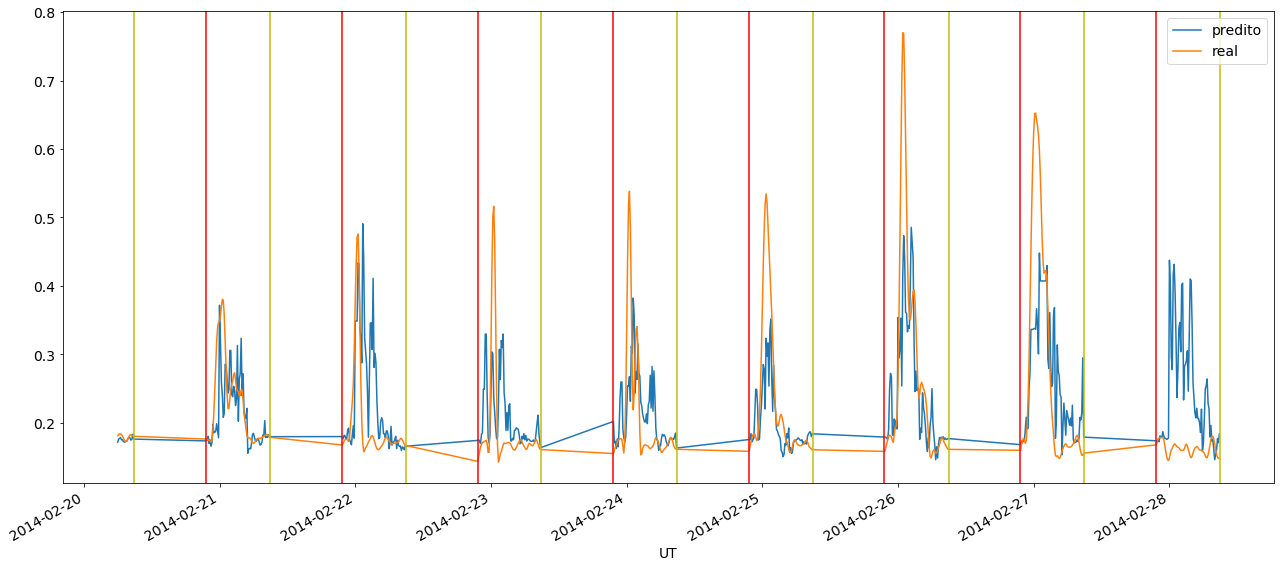

In [35]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag, 's4')

O erro quadrático médio foi: 0.001001
O erro quadrático total foi: 1.233253
O maior erro por previsão foi: 0.296290
O erro relativo foi: 8.040000%
O número de verdadeiros negativos foi: 1035
O número de verdadeiros positivos foi: 306
O número de falsos negativos foi: 47
O número de falsos positivos foi: 132
O POD foi: 0.866856
O FAR foi: 0.301370
A ACC foi: 0.882237
O kappa foi: 0.038537

Error for the time series sample:
O erro quadrático médio foi: 0.012732
O erro quadrático total foi: 2.674995
O maior erro por previsão foi: 0.602440
O erro relativo foi: 23.560580%
O número de verdadeiros negativos foi: 298
O número de verdadeiros positivos foi: 89
O número de falsos negativos foi: 64
O número de falsos positivos foi: 111
O POD foi: 0.581699
O FAR foi: 0.555000
A ACC foi: 0.688612
O kappa foi: 0.091662


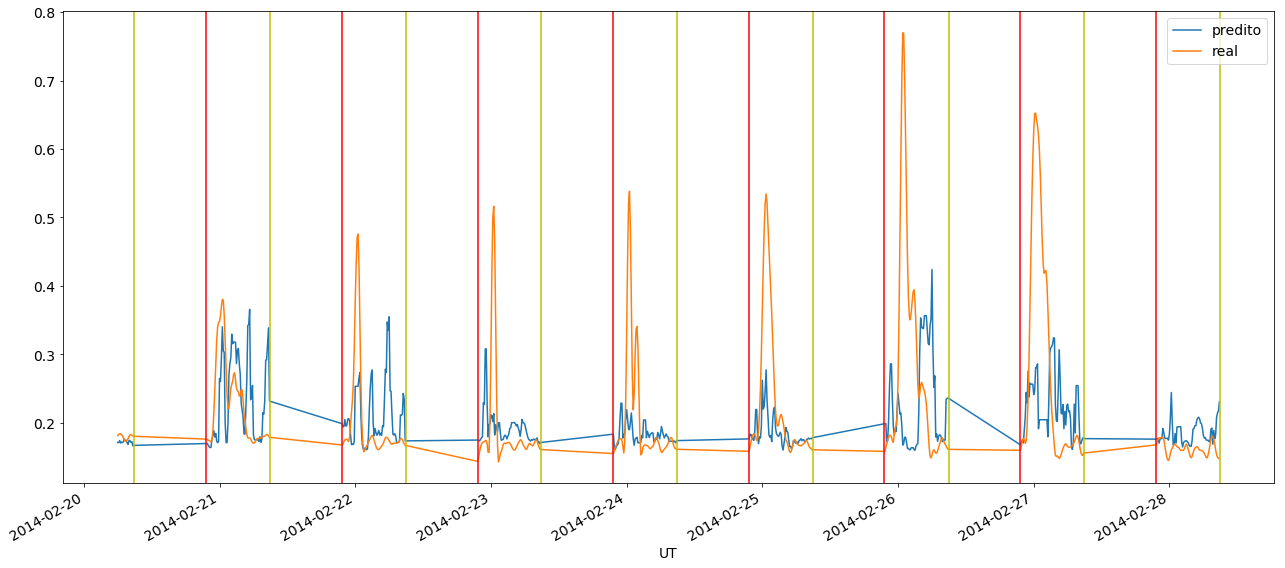

In [36]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv1, 's4')

O erro quadrático médio foi: 0.001051
O erro quadrático total foi: 1.263667
O maior erro por previsão foi: 0.308338
O erro relativo foi: 8.264669%
O número de verdadeiros negativos foi: 1041
O número de verdadeiros positivos foi: 314
O número de falsos negativos foi: 39
O número de falsos positivos foi: 126
O POD foi: 0.889518
O FAR foi: 0.286364
A ACC foi: 0.891447
O kappa foi: 0.034697

Error for the time series sample:
O erro quadrático médio foi: 0.013921
O erro quadrático total foi: 2.797042
O maior erro por previsão foi: 0.585034
O erro relativo foi: 24.771912%
O número de verdadeiros negativos foi: 316
O número de verdadeiros positivos foi: 87
O número de falsos negativos foi: 66
O número de falsos positivos foi: 93
O POD foi: 0.568627
O FAR foi: 0.516667
A ACC foi: 0.717082
O kappa foi: 0.091650


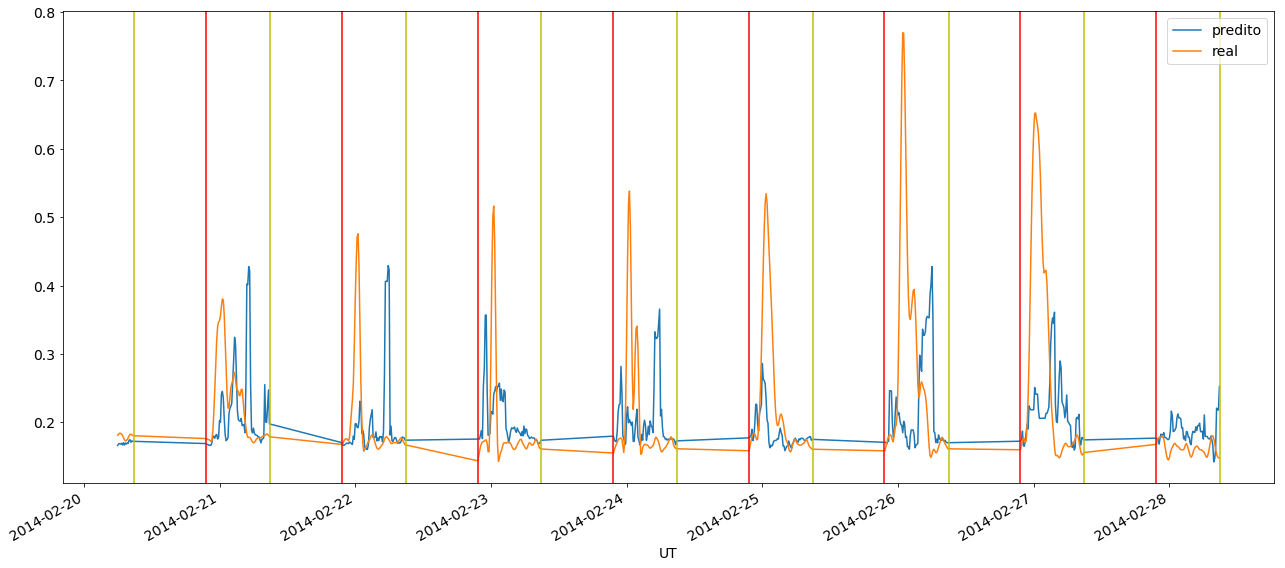

In [37]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv2, 's4')

O erro quadrático médio foi: 0.000907
O erro quadrático total foi: 1.173832
O maior erro por previsão foi: 0.322348
O erro relativo foi: 7.740513%
O número de verdadeiros negativos foi: 1052
O número de verdadeiros positivos foi: 305
O número de falsos negativos foi: 48
O número de falsos positivos foi: 115
O POD foi: 0.864023
O FAR foi: 0.273810
A ACC foi: 0.892763
O kappa foi: 0.037037

Error for the time series sample:
O erro quadrático médio foi: 0.011628
O erro quadrático total foi: 2.556311
O maior erro por previsão foi: 0.606058
O erro relativo foi: 20.522111%
O número de verdadeiros negativos foi: 324
O número de verdadeiros positivos foi: 78
O número de falsos negativos foi: 75
O número de falsos positivos foi: 85
O POD foi: 0.509804
O FAR foi: 0.521472
A ACC foi: 0.715302
O kappa foi: 0.097928


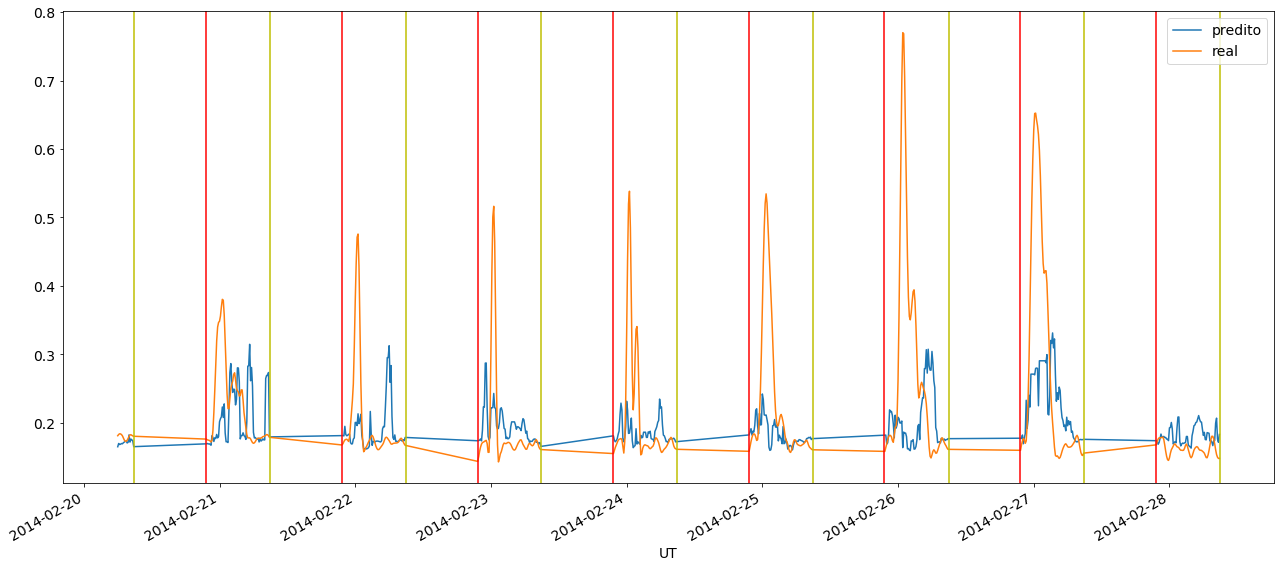

In [38]:
generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv1 + mdv2, 's4')

O erro quadrático médio foi: 0.001104
O erro quadrático total foi: 1.295527
O maior erro por previsão foi: 0.285709
O erro relativo foi: 8.484081%
O número de verdadeiros negativos foi: 1035
O número de verdadeiros positivos foi: 299
O número de falsos negativos foi: 54
O número de falsos positivos foi: 132
O POD foi: 0.847025
O FAR foi: 0.306265
A ACC foi: 0.877632
O kappa foi: 0.041273

Error for the time series sample:
O erro quadrático médio foi: 0.009346
O erro quadrático total foi: 2.291794
O maior erro por previsão foi: 0.558790
O erro relativo foi: 18.436840%
O número de verdadeiros negativos foi: 315
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 94
O POD foi: 0.790850
O FAR foi: 0.437209
A ACC foi: 0.775801
O kappa foi: 0.067926


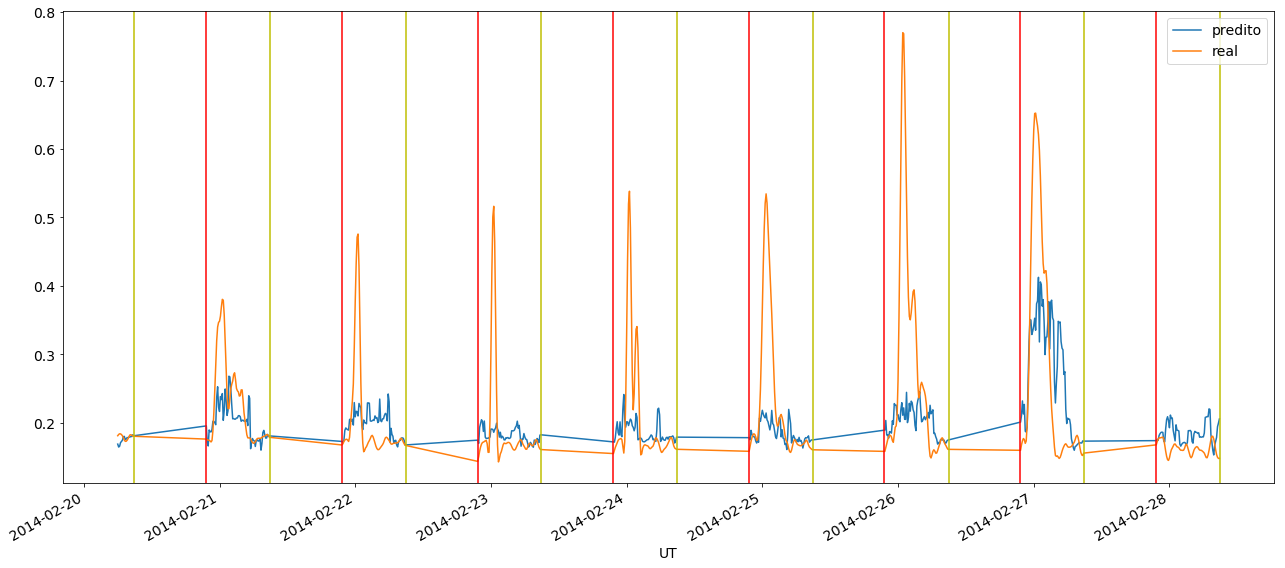

In [39]:
generate_and_avaliate_model(df, original + tempo + lag + mdv1 + mdv2, 's4')